In [273]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
%matplotlib inline

In [167]:
#to dsiplay all the columns
pd.set_option('display.max_columns',50)

In [275]:
#reading the data file
data=pd.read_excel(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\Data Sample Shared\Prepayment_Data.xlsx")

In [169]:
#to reduce the warning outputs
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## UNIVARIATE ANALYSIS

In [170]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192533 entries, 0 to 192532
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             192533 non-null  int64         
 1   AGREEMENTID            192533 non-null  int64         
 2   CUSTOMERID             192533 non-null  int64         
 3   LOAN_AMT               192533 non-null  float64       
 4   NET_DISBURSED_AMT      192533 non-null  float64       
 5   INTEREST_START_DATE    192533 non-null  datetime64[ns]
 6   CURRENT_ROI            192533 non-null  float64       
 7   ORIGNAL_ROI            192533 non-null  float64       
 8   CURRENT_TENOR          192533 non-null  int64         
 9   ORIGNAL_TENOR          192533 non-null  int64         
 10  DUEDAY                 192533 non-null  int64         
 11  AUTHORIZATIONDATE      192533 non-null  datetime64[ns]
 12  CITY                   192525 non-null  obje

In [171]:
data

,Unnamed: 0,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,CUST_CONSTTYPE_ID,CUST_CATEGORYID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME,BRANCH_PINCODE,FORECLOSURE
0,0,11220001,12001000,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19,0.0,0.60,HL,10901100,NaN,NaN,39,1,5,33,M,M,POSTGRAD,0,198375.221829,198375.221829,400070,1
1,1,11220001,12001000,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18,0.0,0.60,HL,10901100,NaN,NaN,40,1,5,33,M,M,POSTGRAD,0,198375.221829,198375.221829,400070,1
2,2,11220001,12001000,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,58,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17,0.0,0.60,HL,10901100,NaN,NaN,41,1,5,33,M,M,POSTGRAD,0,198375.221829,198375.221829,400070,1
3,3,11220001,12001000,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,58,120,1,1970-08-30,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,1974-02-02,83559.0,40.06,41,17,0.0,0.60,HL,10901100,NaN,NaN,42,1,5,33,M,M,POSTGRAD,0,198375.221829,198375.221829,400070,1
4,4,11220001,12001000,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,58,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15,0.0,0.60,HL,10901100,NaN,NaN,43,1,5,33,M,M,POSTGRAD,0,198375.221829,198375.221829,400070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192528,192528,11253349,12033890,9.251147e+06,9.251147e+06,2015-06-30,13.421934,13.421934,240,240,5,2015-06-30,PUNE,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,9.251147e+06,0.000000e+00,0.000000e+00,9.251147e+06,2015-06-30,29424.0,65.06,0,240,0.0,0.89,HL,10901104,NaN,NaN,0,1,4,32,M,M,GRAD,0,241309.534337,241309.529834,411005,0
192529,192529,11253349,12033890,9.251147e+06,9.251147e+06,2015-06-30,13.421934,13.421934,240,240,5,2015-06-30,PUNE,20320.886952,20320.886952,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,9.251147e+06,0.000000e+00,1.381342e+04,9.251147e+06,2015-07-05,9201.0,65.06,0,240,0.0,0.89,HL,10901104,NaN,NaN,1,1,4,32,M,M,GRAD,0,241309.534337,241309.529834,411005,0
192530,192530,11253350,12033891,2.299951e+06,2.299951e+06,2015-06-29,13.109796,13.109796,240,240,5,2015-06-29,HYDERABAD,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,2.299951e+06,0.000000e+00,0.000000e+00,2.299951e+06,2015-06-27,3033.0,43.71,0,240,0.0,0.56,HL,10901104,NaN,NaN,0,1,5,29,M,M,GRAD,0,40817.230210,40817.230210,500034,0
192531,192531,11253351,12033892,2.10

In [276]:
#dropping not reqired columns
data.drop(columns=['Unnamed: 0'], inplace=True)

<Axes: >

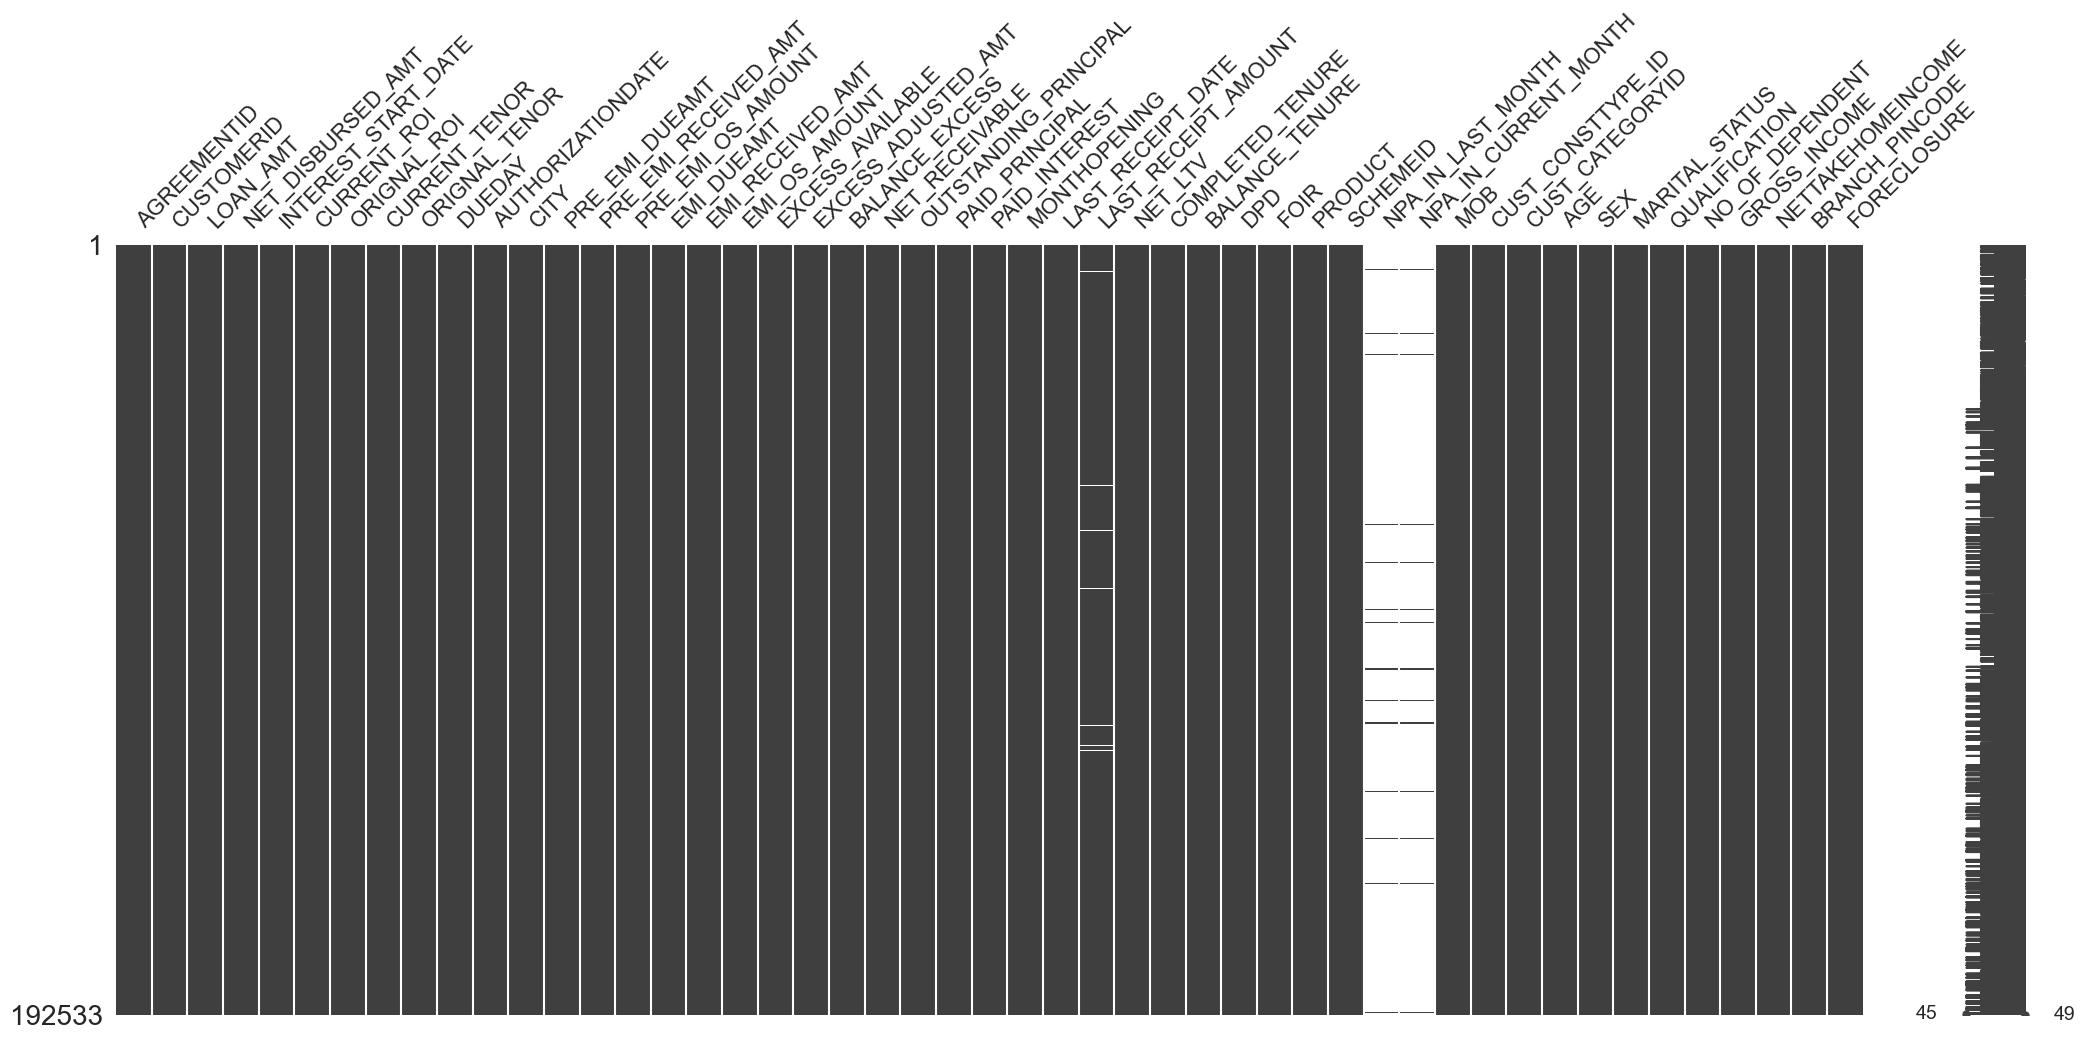

In [277]:
# Visualize missing values as a matrix
msno.matrix(data)

In [278]:
#dropping not reqired columns
data.drop(columns=['NPA_IN_LAST_MONTH','NPA_IN_CURRENT_MONTH'], inplace=True)

In [280]:
#chechking descriptive stats for continuos variables
summary_num=data.describe()
summary_num.to_excel(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\summary_num.xlsx")

In [281]:
#chechking descriptive stats for categorical variables
summary_cat=data.describe(include='object')
summary_cat.to_excel(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\summary_cat.xlsx")

In [176]:
#having a look at the data post cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192533 entries, 0 to 192532
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   AGREEMENTID            192533 non-null  int64         
 1   CUSTOMERID             192533 non-null  int64         
 2   LOAN_AMT               192533 non-null  float64       
 3   NET_DISBURSED_AMT      192533 non-null  float64       
 4   INTEREST_START_DATE    192533 non-null  datetime64[ns]
 5   CURRENT_ROI            192533 non-null  float64       
 6   ORIGNAL_ROI            192533 non-null  float64       
 7   CURRENT_TENOR          192533 non-null  int64         
 8   ORIGNAL_TENOR          192533 non-null  int64         
 9   DUEDAY                 192533 non-null  int64         
 10  AUTHORIZATIONDATE      192533 non-null  datetime64[ns]
 11  CITY                   192525 non-null  object        
 12  PRE_EMI_DUEAMT         192533 non-null  floa

## Data Cleaning and Basic Manipulation

### Cleaning the Dates Columns

In [177]:
#some dates have values of authorization dates which are in 1970s
#with respect to the analysis we don't need the authorization_rates and interest start_dates
#we could have used the last receipt date to some sort of feature engineering but given the impurtity 
#we fins out that all the receipts column were ina fequency of approx 1 month
#given our analysis we can drop the datetime columns
data.drop(columns=['INTEREST_START_DATE', 'AUTHORIZATIONDATE', 'LAST_RECEIPT_DATE'],inplace=True)

### Some of the income are shown as zero

In [178]:
#replacing abnormal values with nan
data.NETTAKEHOMEINCOME=data.NETTAKEHOMEINCOME.apply(lambda x : np.nan if x<10 else x )
data.GROSS_INCOME=data.GROSS_INCOME.apply(lambda x : np.nan if x<10 else x )

In [179]:
#replacing abnormal values as 0 income with mean 
mni=data.NETTAKEHOMEINCOME.mean()
mgi=data.GROSS_INCOME.mean()
data.NETTAKEHOMEINCOME.fillna(mni,inplace=True)
data.GROSS_INCOME.fillna(mgi,inplace=True)

### Maniulation of Cities

In [180]:
#creating a dictionary of tier 1 cities
Tier_1dict={'BANGALORE':1, 'DELHI':1, 'CHENNAI':1, 'HYDERABAD':1,'MUMBAI':1, 'PUNE':1, 'AHMEDABAD':1, 'KOLKATA':1 }
#creating a list of tier 2 cities
list_2=['Ajmer', 'Bikaner', 'Kota', 'Jaipur', 'Jodhpur','Coimbatore', 'Erode', 'Madurai', 'Thanjavur', 
      'Tiruppur', 'Tirunelveli', 'Tiruvannamalai', 'Tiruchirappalli', 'Vellore', 'Salem',
     'FARIDABAD', 'GHAZIABAD', 'NOIDA', 'GURGAON','Amravati', 'Bhiwandi', 'Jalgaon', 'Nagpur',
      'Nanded', 'Aurangabad', 'Kolhapur', 'Nashik', 'Sangli', 'Solapur', 'Vasai-Virar' 'Ujjain', 
      'NAVI MUMBAI', 'THANE', 'Ahmedabad', 'Bhavnagar', 'Jamnagar', 'Rajkot', 'Surat', 'Vadodara',
      'Kannur', 'Kollam', 'Kozhikode', 'Kochi', 'Malappuram', 'Thrissur', 'Thiruvanathpuram', 'Vijayapura',
    'Guntur', 'Kakinada', 'Kurnool', 'Nellore', 'Rajamahendravaram', 'Vijayawada', 
      'VISHAKHAPATNAM', 'Warangal', 'PONDICHERRY 1', 'TIRUPUR','PONDICHERRY', 
        'TUTICORIN', 'TRICHY', 'MYSORE', 'BARODA','ANAND','KOLAR'] 

In [181]:
#definititon to upper case a list and to convert a list to a dictionary
#creating a upper case list
def upper_list(list_):
    name=str(list_)+'_upper'
    name=[]
    for x in list_:
        y=x.upper()
        name.append(y)
    return name
#creating a dict from list
def convert_li_dic(lst, tier):
   new_dict = {}
   for i in range(0, len(lst)):
       new_dict[lst[i]] = tier
   return new_dict

In [182]:
#coverting teh list of ities to upper and case and a dictionary
upper_list=upper_list(list_2)
Tier_2dict=convert_li_dic(upper_list,2)

In [183]:
#repalcing city names with the tier number
data.CITY.replace(Tier_1dict, inplace=True)
data.CITY.replace(Tier_2dict,inplace=True)

In [184]:
#converting the rest of the remaining cities ot tier 3 cities
for x in data['CITY']:
    dt=type(x)
    if dt==str:
        data['CITY'].replace({x:3},inplace=True)
    else:
        continue

### CONVERTING THE CATEGORICAL VARIABLES VIA ENCODING SO WE CAN SUMMARIZE THE DATA

In [185]:
#now we would first convert the categorical variables to encoded data
data_mod=pd.get_dummies(data=data,columns=['PRODUCT','SEX','MARITAL_STATUS', 'QUALIFICATION'])

In [186]:
#grouping and summariing the data on customer
data_mod=data_mod.groupby(['CUSTOMERID']).mean()

### We can now drop the ID columns too except the Cust ID

In [187]:
data_mod.drop(columns=['AGREEMENTID', 'BRANCH_PINCODE','CUST_CONSTTYPE_ID', 
                       'CUST_CATEGORYID', 'SCHEMEID'], inplace=True)

## BASIC INFERENCES

In [188]:
#top 20 customers by loan amount
data_mod.groupby(['CUSTOMERID'])['LOAN_AMT','GROSS_INCOME',
        'NETTAKEHOMEINCOME','FORECLOSURE'].mean().sort_values(by='LOAN_AMT',ascending=False).head(20)

C:\Users\jubin\AppData\Local\Temp\ipykernel_35696\2276501043.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_mod.groupby(['CUSTOMERID'])['LOAN_AMT','GROSS_INCOME',


,LOAN_AMT,GROSS_INCOME,NETTAKEHOMEINCOME,FORECLOSURE
CUSTOMERID,,,,
12007082,2.447112e+08,1.549623e+05,1.549701e+05,0.0
12013517,2.229424e+08,1.549623e+05,1.549701e+05,0.0
12007090,1.950676e+08,1.549623e+05,1.549701e+05,0.0
12009998,1.801555e+08,1.549623e+05,1.549701e+05,0.0
12011056,1.773030e+08,1.549623e+05,1.549701e+05,0.0
12013495,1.684454e+08,1.549623e+05,1.549701e+05,0.0
12002065,1.351166e+08,1.549623e+05,1.549701e+05,0.0
12006813,1.201037e+08,6.173683e+06,6.173683e+06,0.0
12005540,1.177016e+08,1.549623e+05,1.549701e+05,0.0


In [189]:
#funciton to create a distplot, violinplot and a boxplot on the same axis
def ditribution_uni(Variable):
    sns.set()
    fig, axes = plt.subplots(1,3, sharey=False, figsize=(18, 5))
    name='Distribution of'+ ' ' + Variable
    plt.suptitle(name)
    #create chart in each subplot
    sns.boxplot(data=data_mod, y=Variable, ax=axes[0])
    sns.distplot( x=data_mod[Variable], ax=axes[1])
    sns.violinplot(data=data_mod, y=Variable, ax=axes[2])

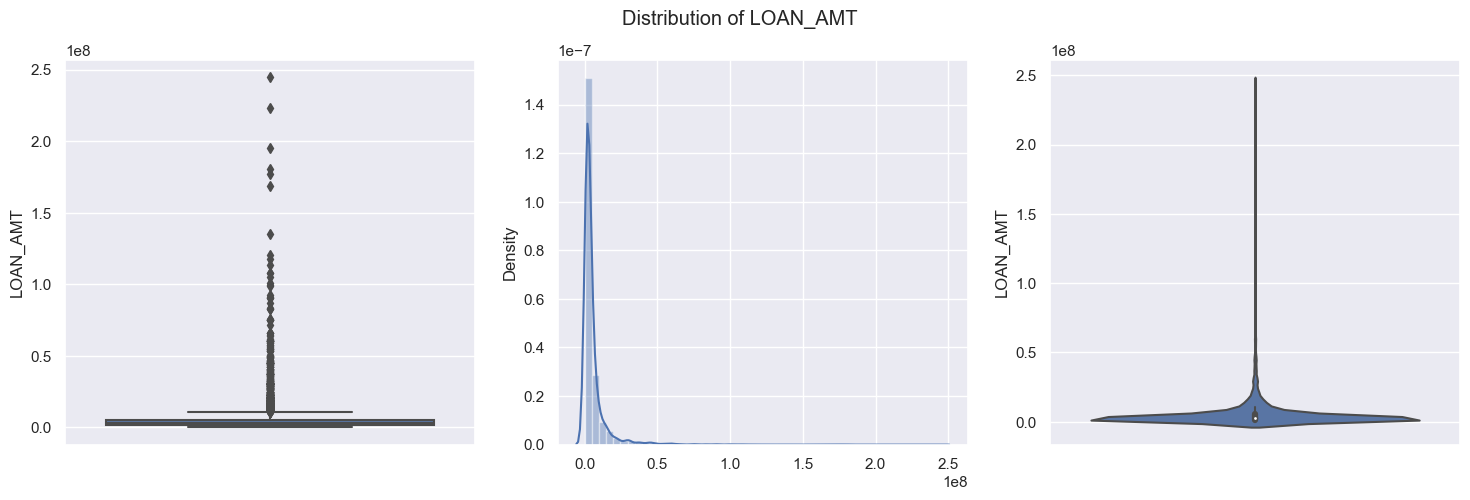

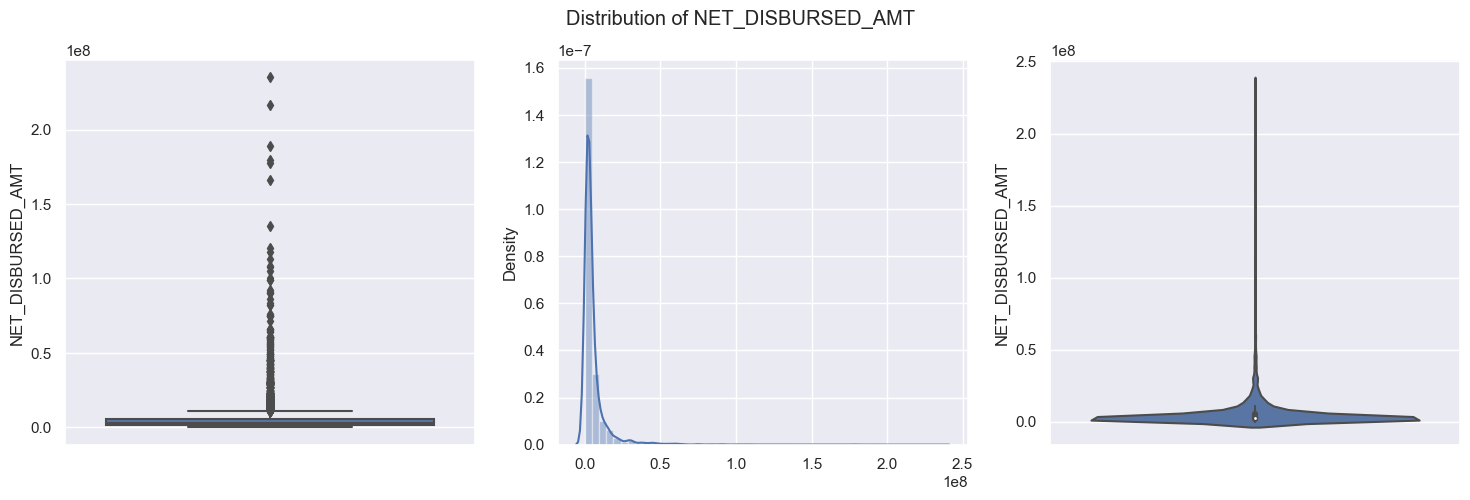

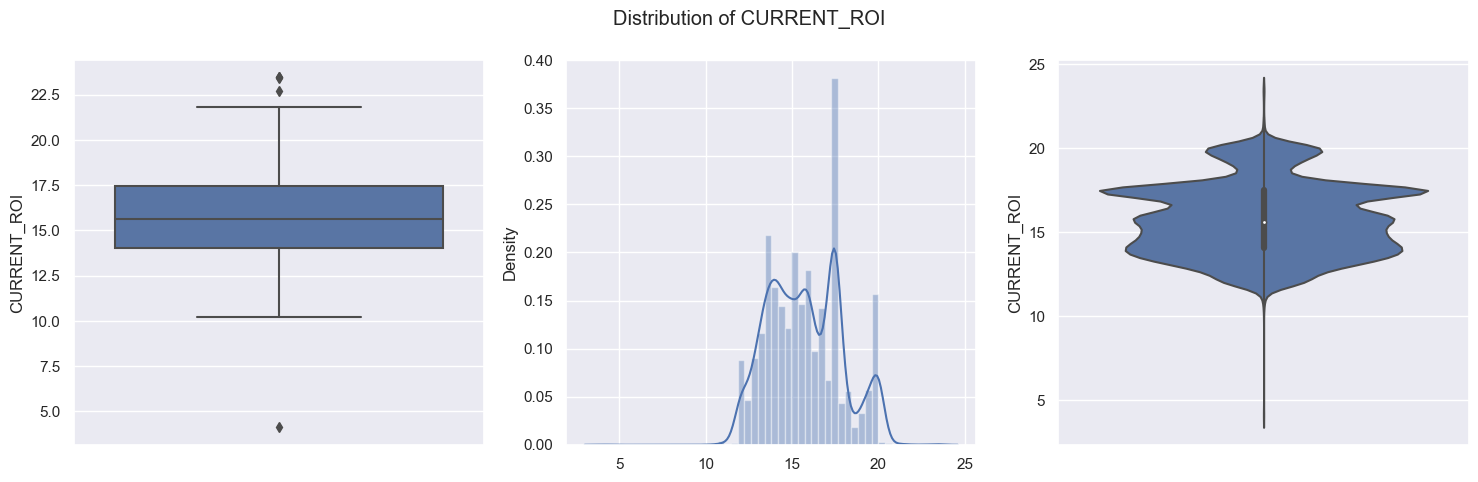

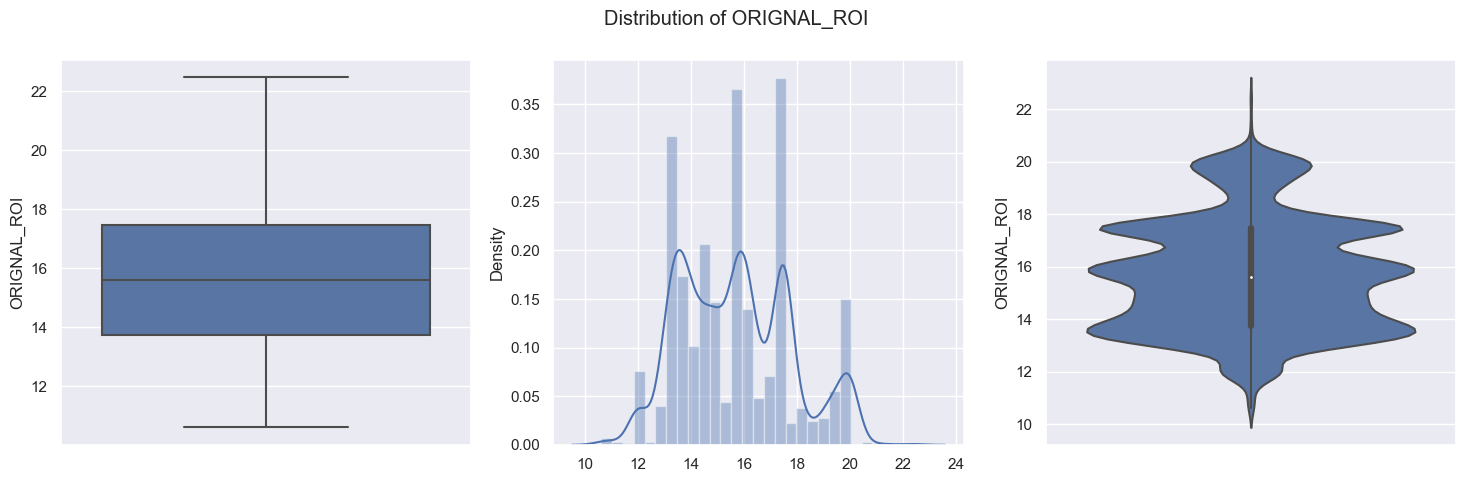

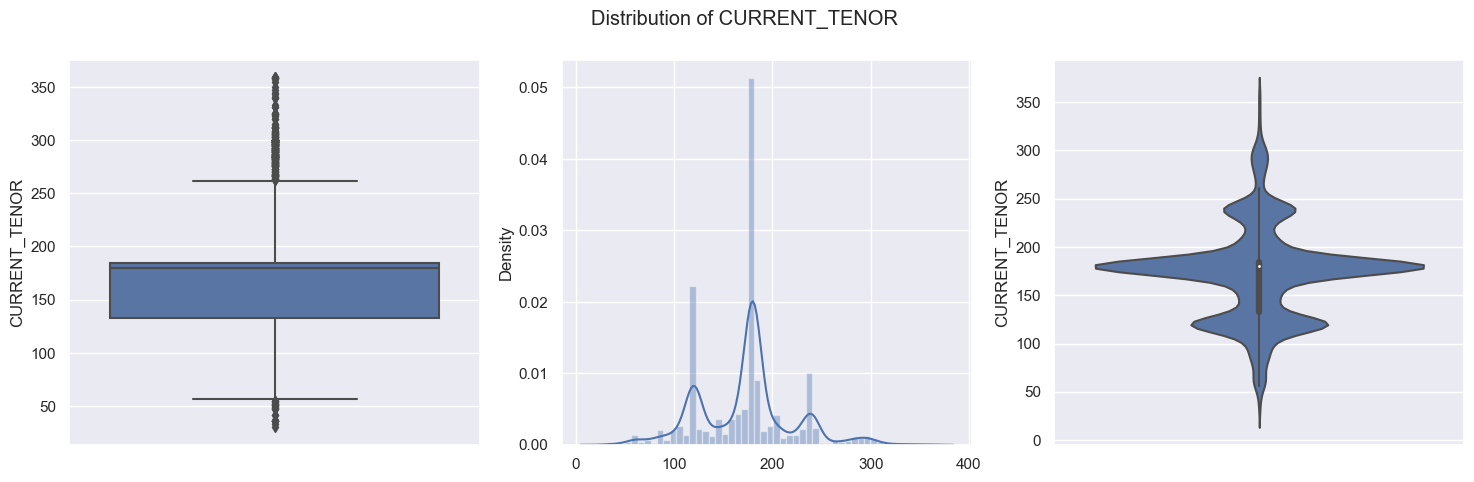

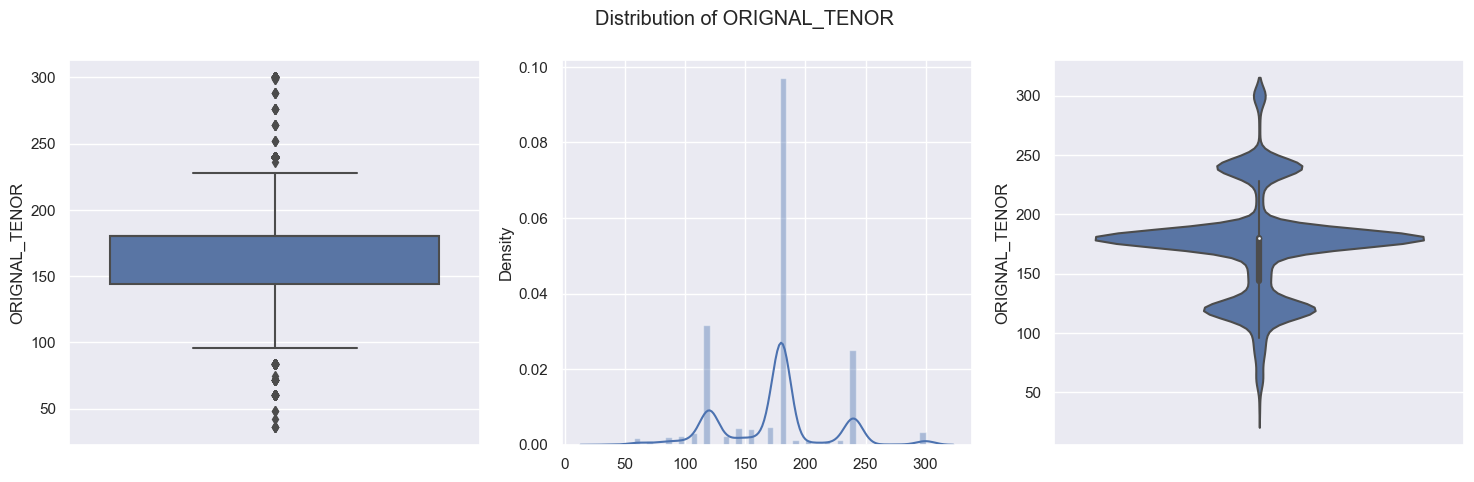

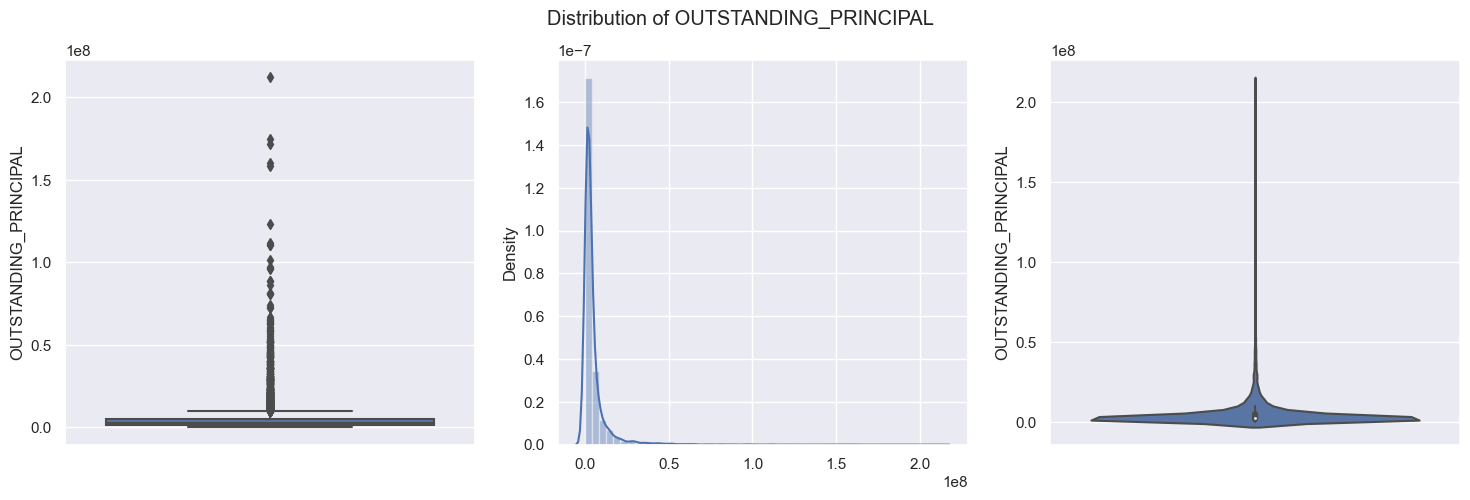

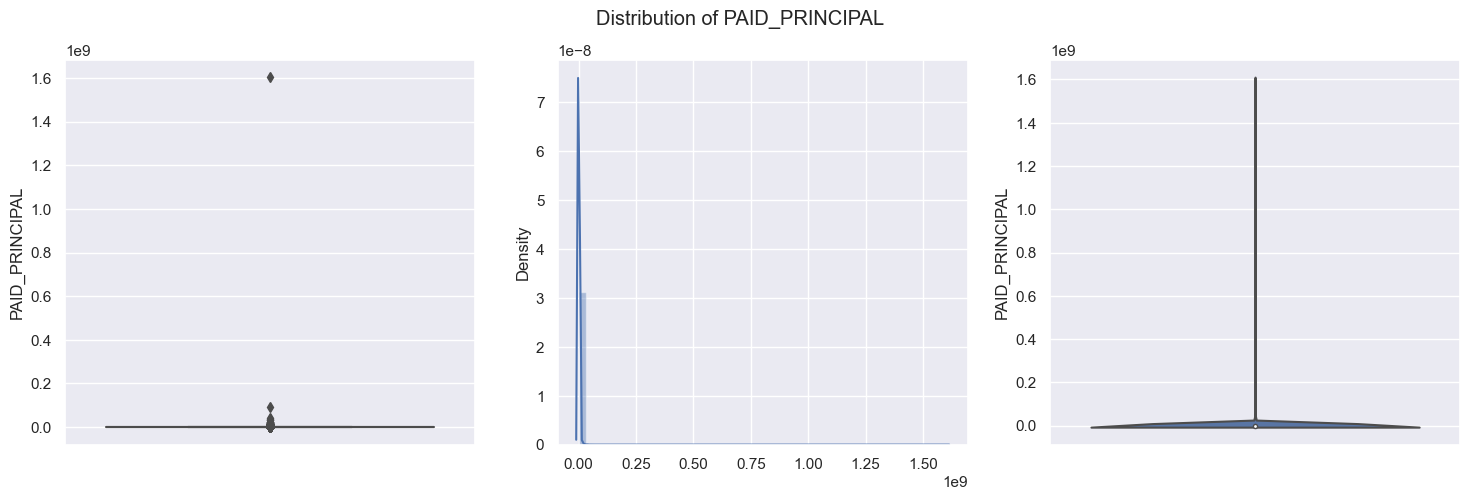

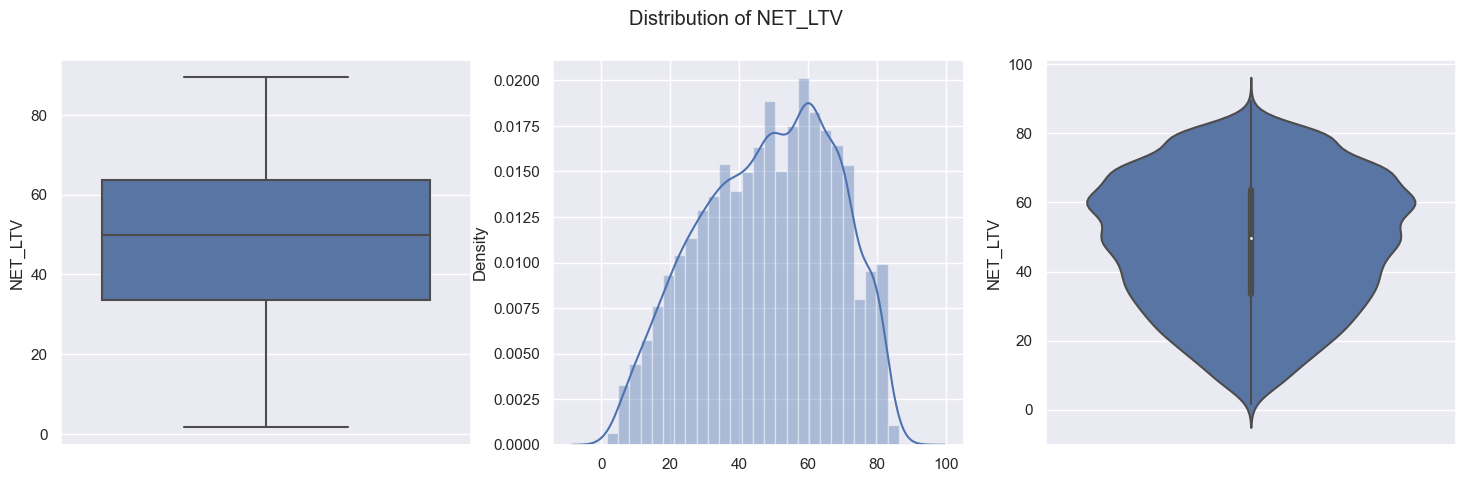

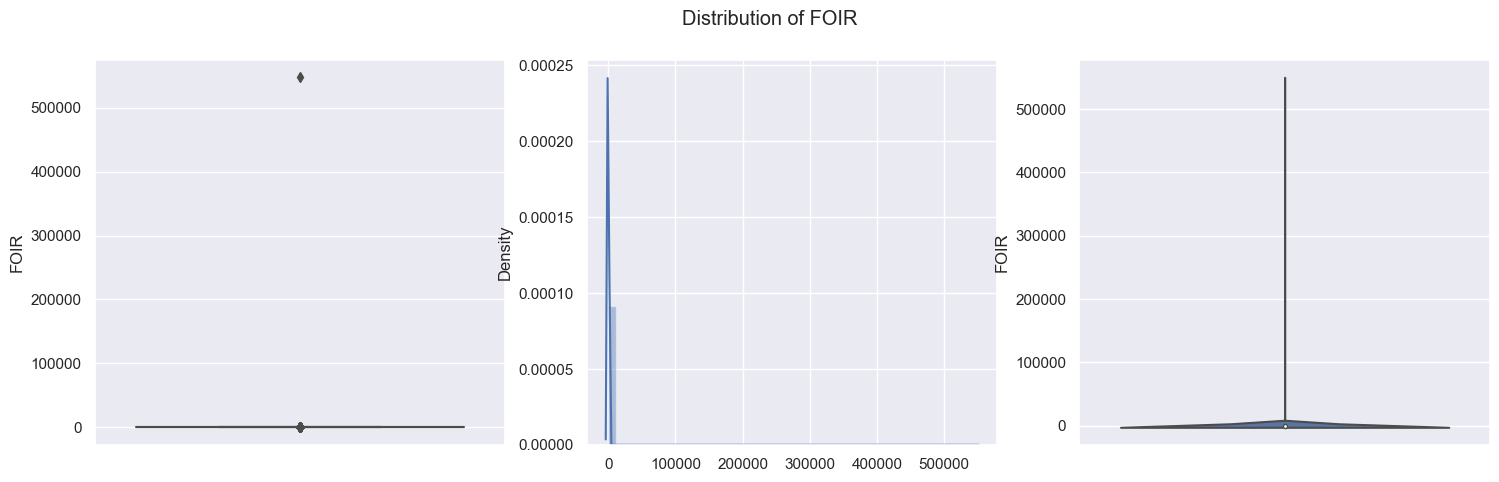

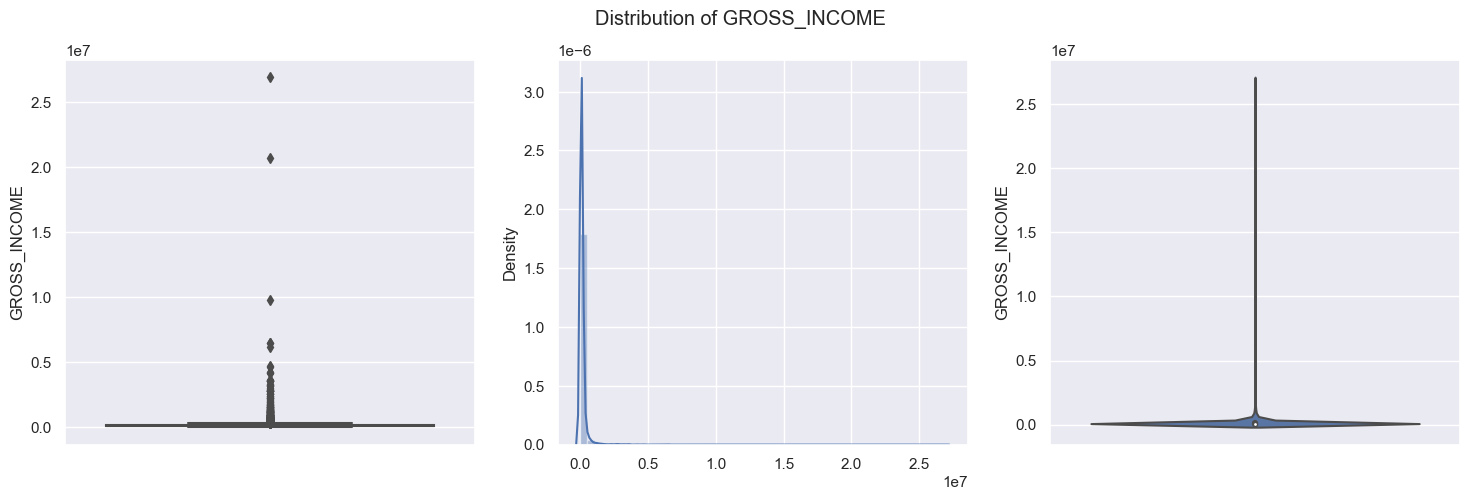

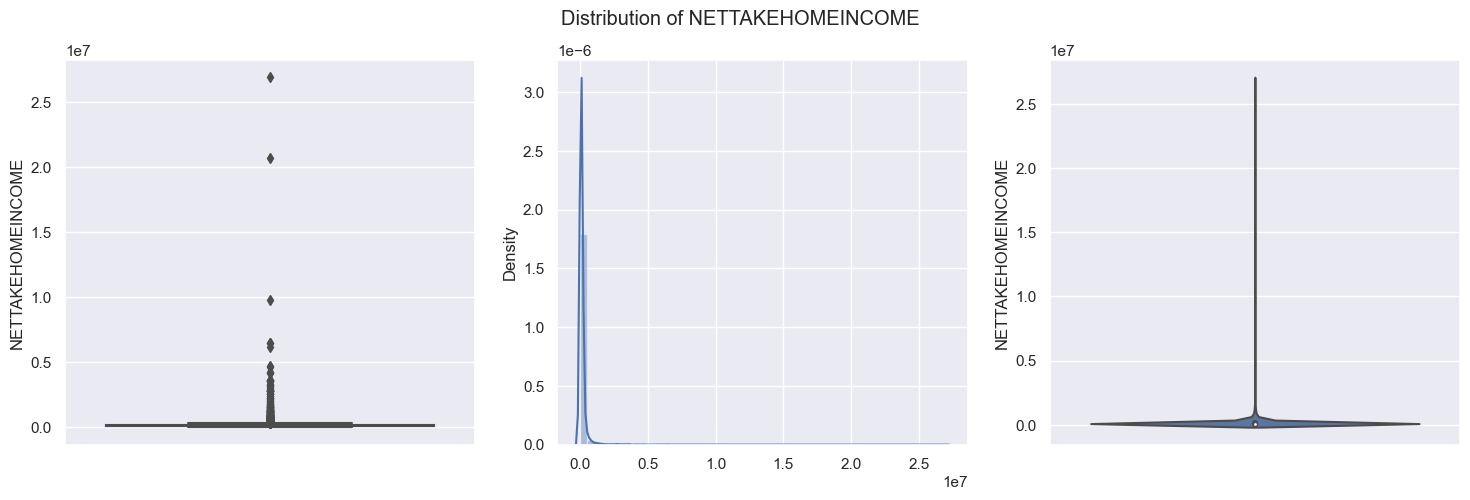

In [190]:
#cross checking the distribution and outliers
ditribution_uni('LOAN_AMT')
ditribution_uni('NET_DISBURSED_AMT')
ditribution_uni('CURRENT_ROI')
ditribution_uni('ORIGNAL_ROI')
ditribution_uni('CURRENT_TENOR')
ditribution_uni('ORIGNAL_TENOR')
ditribution_uni('OUTSTANDING_PRINCIPAL')
ditribution_uni('PAID_PRINCIPAL')
ditribution_uni('NET_LTV')
ditribution_uni('FOIR')
ditribution_uni('GROSS_INCOME')
ditribution_uni('NETTAKEHOMEINCOME')

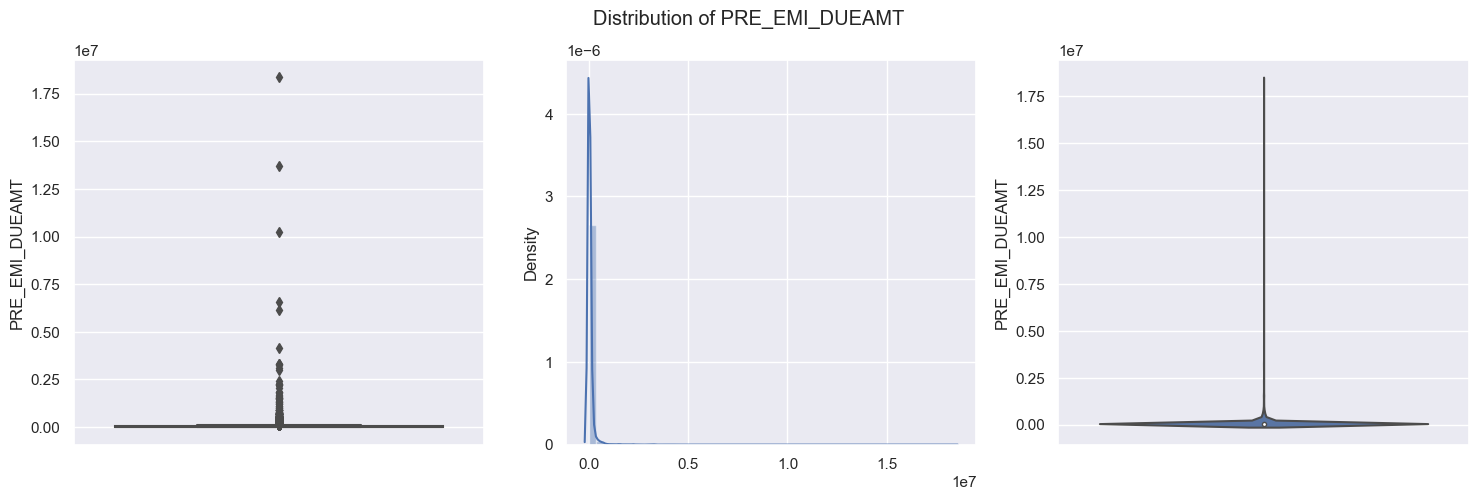

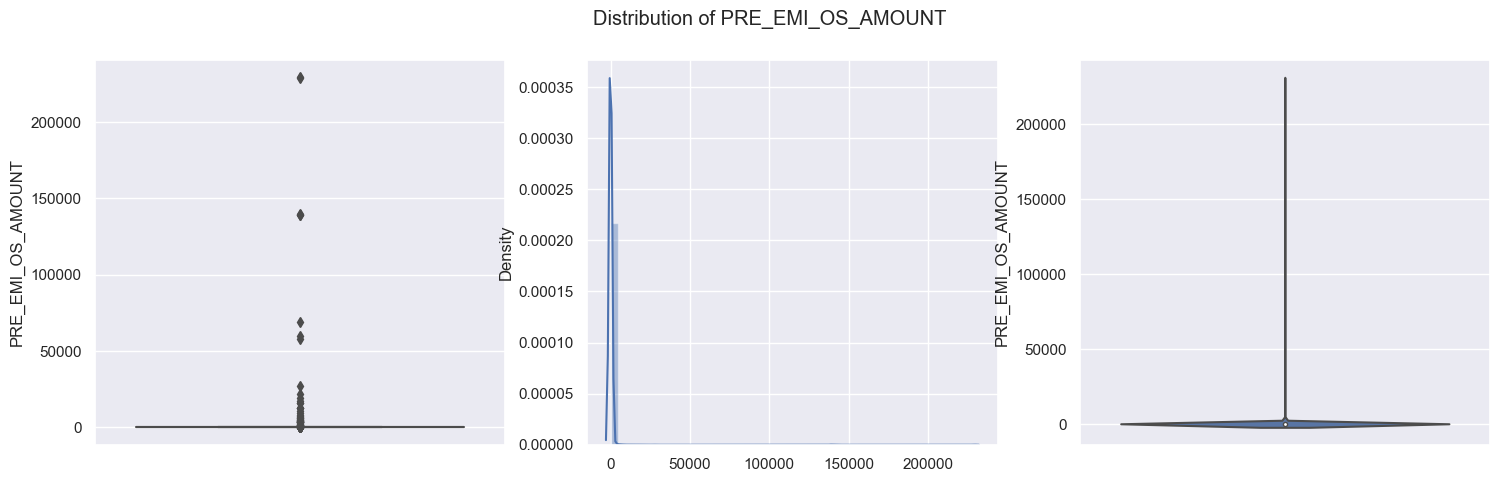

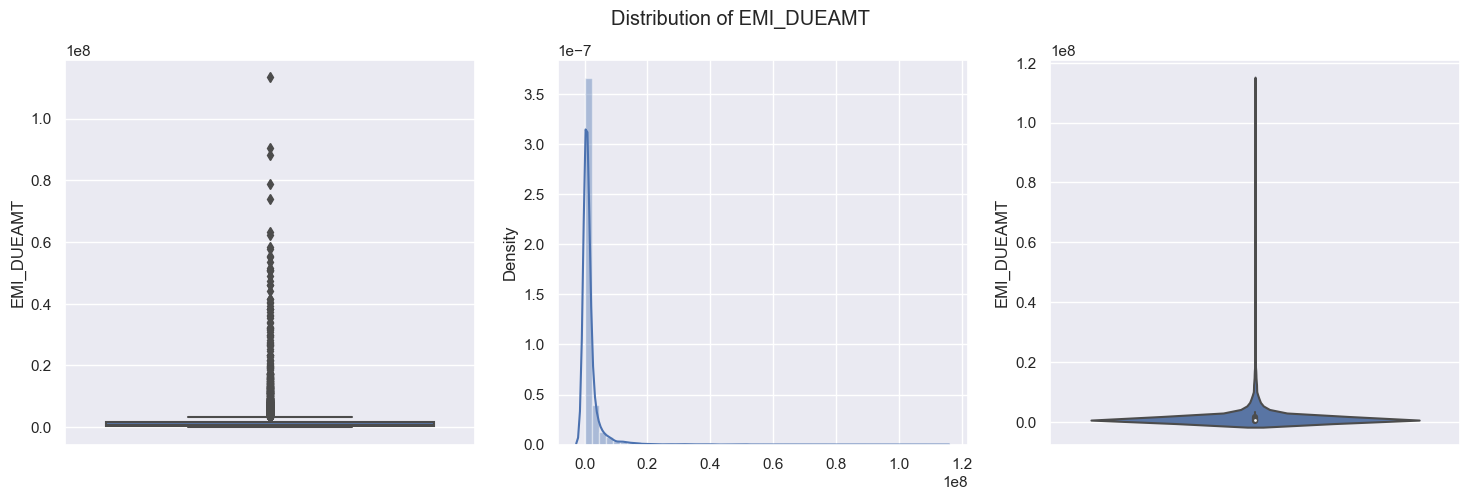

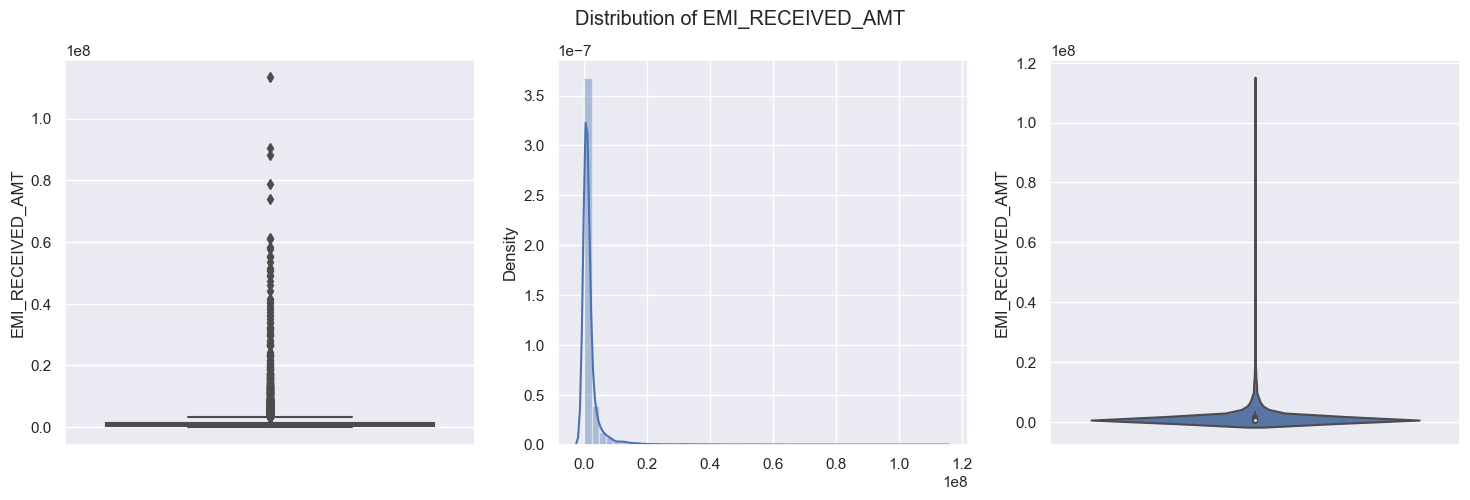

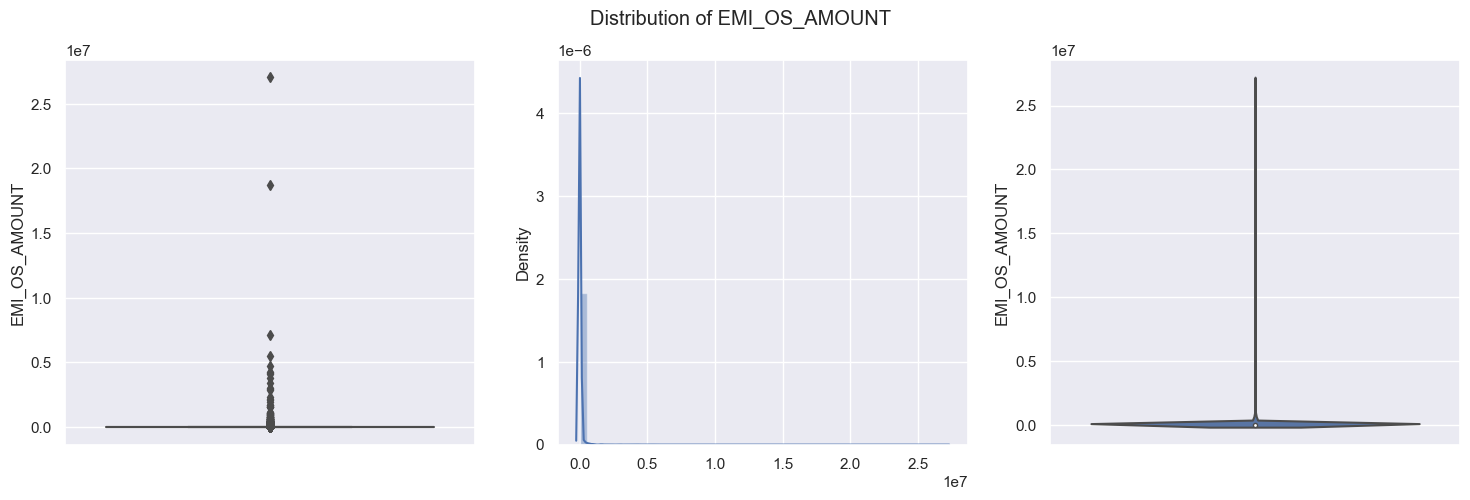

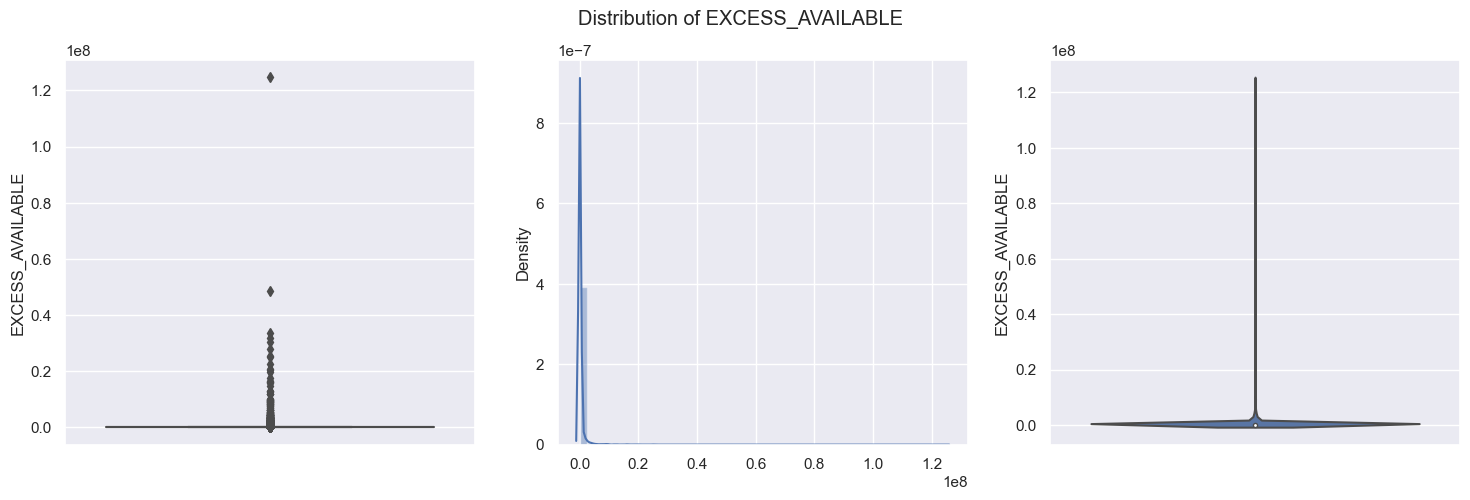

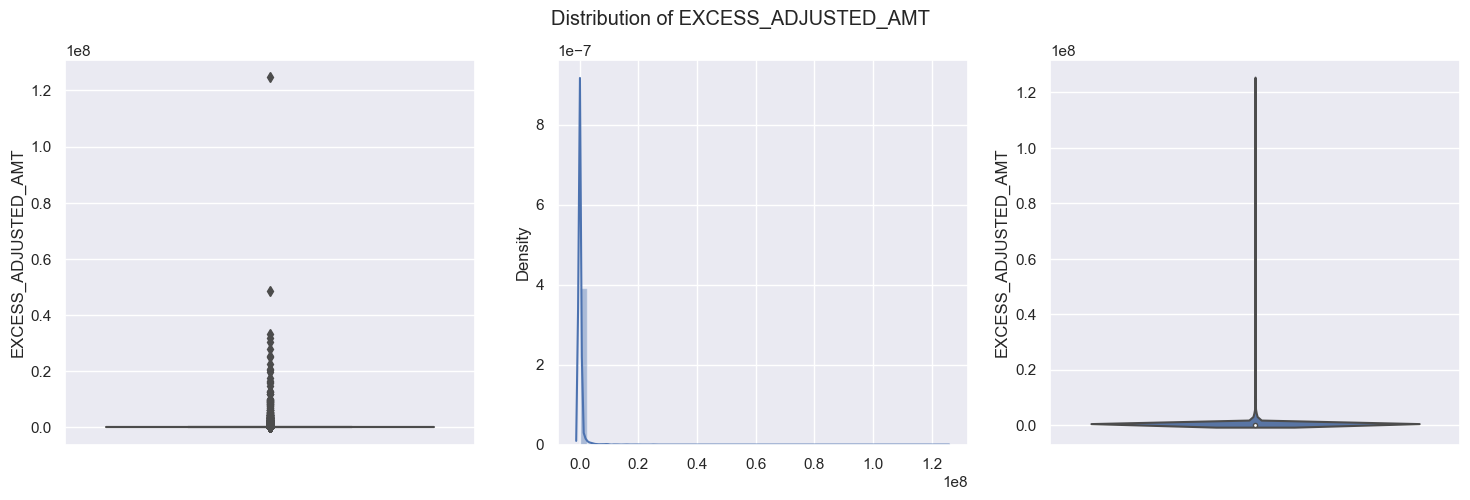

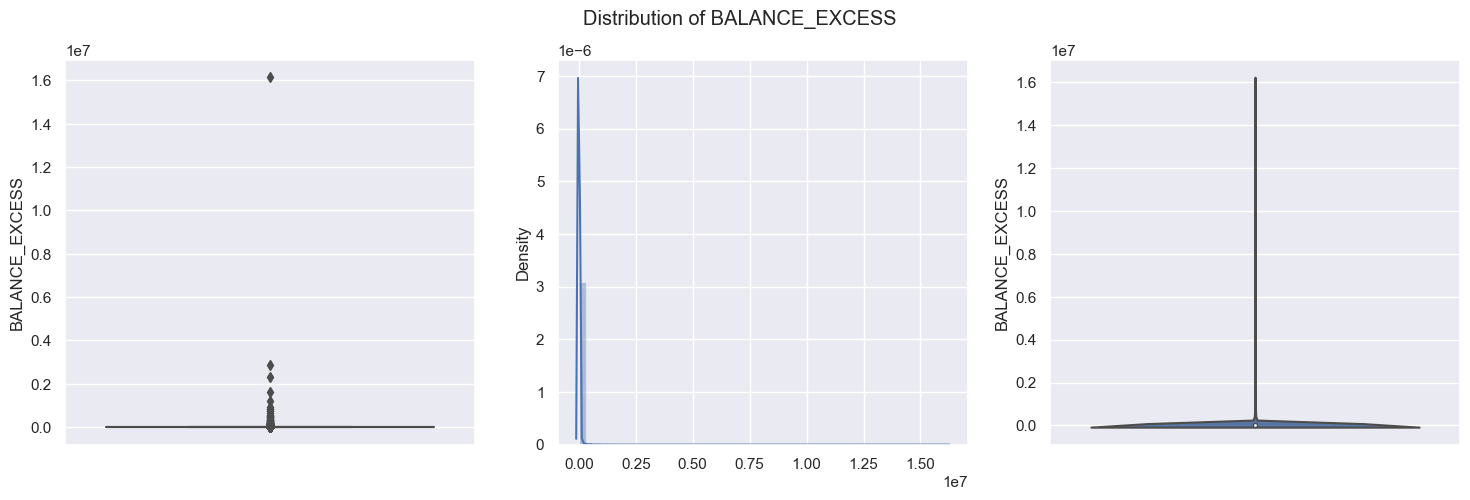

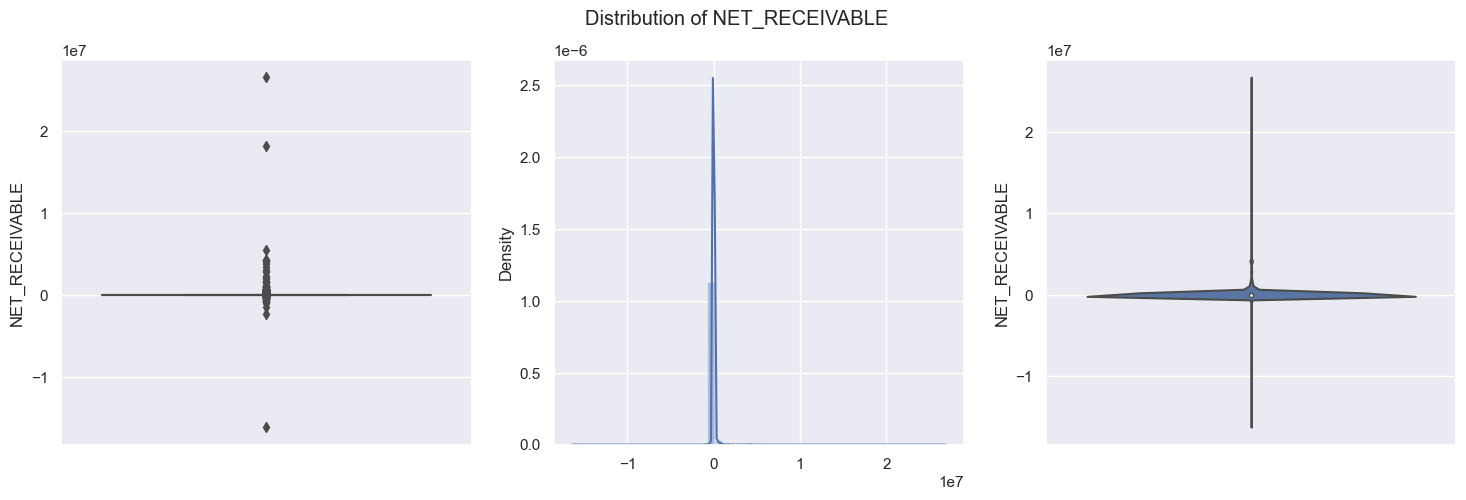

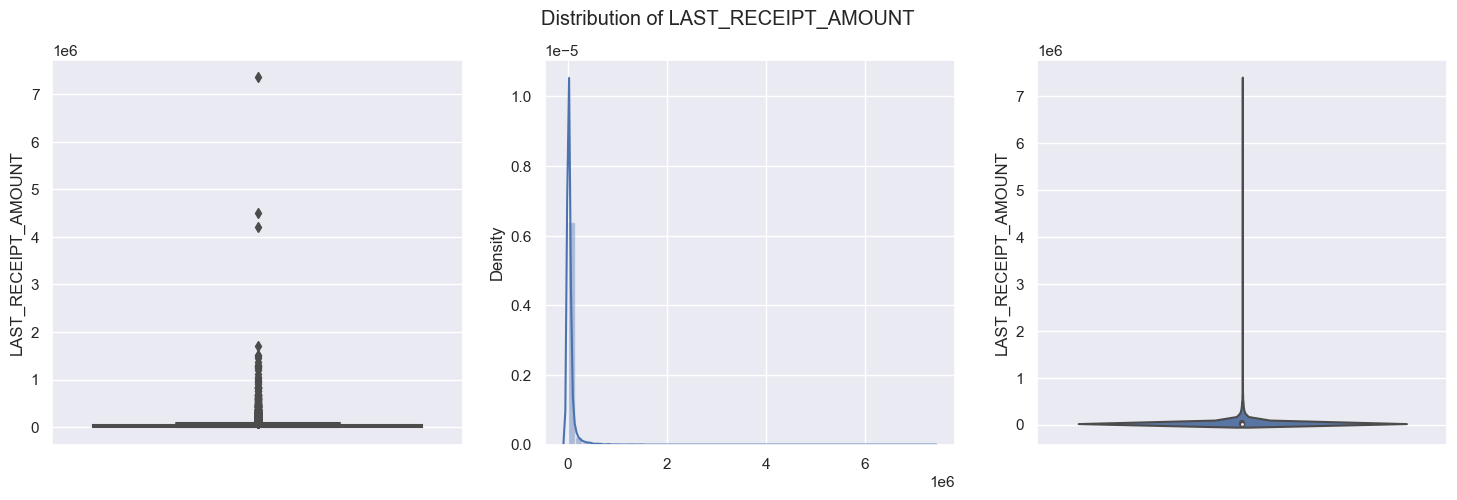

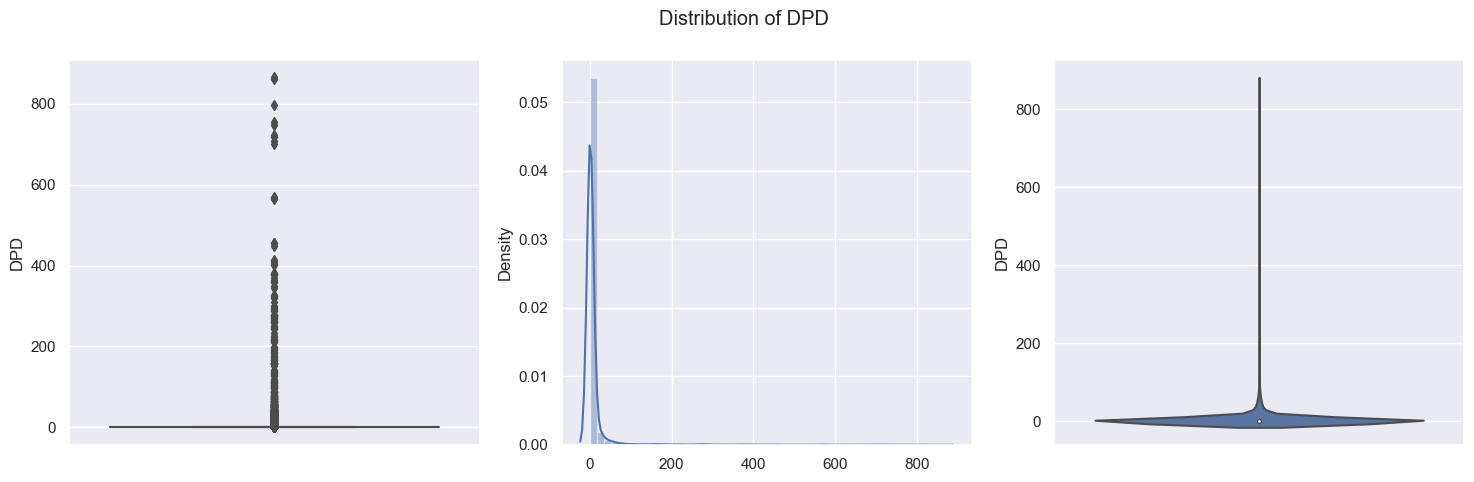

In [191]:
#cross checking the distribution and outliers
ditribution_uni('PRE_EMI_DUEAMT')
ditribution_uni('PRE_EMI_OS_AMOUNT')
ditribution_uni('EMI_DUEAMT')
ditribution_uni('EMI_RECEIVED_AMT')
ditribution_uni('EMI_OS_AMOUNT')
ditribution_uni('EXCESS_AVAILABLE')
ditribution_uni('EXCESS_ADJUSTED_AMT')
ditribution_uni('BALANCE_EXCESS')
ditribution_uni('NET_RECEIVABLE')
ditribution_uni('LAST_RECEIPT_AMOUNT')
ditribution_uni('DPD')

In [192]:
#some cities averaged out so rounding that number
data_mod.CITY=data_mod.CITY.apply(lambda x: round(x))

In [193]:
#removing the null in last_receipt amount
re=data_mod.LAST_RECEIPT_AMOUNT.mean() 
data_mod.LAST_RECEIPT_AMOUNT = data_mod.LAST_RECEIPT_AMOUNT.fillna(re)

## BASIC EDA

In [194]:
#first lets converted the encoded categ0ircal variables to categorical variables in case the 
#number of cats > 2 
data_en=pd.DataFrame()

In [195]:
#from encoding qualification column to categorical column
data_en['UG']=data_mod.QUALIFICATION_UG.replace({1:'UG'})
data_en['GRAD']=data_mod.QUALIFICATION_GRAD.replace({1:'GRAD'})
data_en['POSTGRAD']=data_mod.QUALIFICATION_POSTGRAD.replace({1:'POSTGRAD'})
data_en['OTHERS']=data_mod.QUALIFICATION_OTHERS.replace({1:'OTHERS'})
data_en['PRF']=data_mod.QUALIFICATION_PRF.replace({1:'PRF'})
data_en['ENG']=data_mod.QUALIFICATION_ENG.replace({1:'ENG'})
data_en['MAT']=data_mod.QUALIFICATION_MAT.replace({1:'MAT'})
data_en['DOCTRATE']=data_mod.QUALIFICATION_DOCTRATE.replace({1:'DOCTRATE'})

Qualification_Cat=[]
for x in range(len(data_en)):
    slice_=data_en.iloc[x:x+1,: ].values.tolist()[0]
    for x in slice_:
        if x == 0:
            continue
        else:
            Qualification_Cat.append(x)

Qual_Cat=pd.DataFrame(Qualification_Cat, columns=['QUALIFICATION'])

In [196]:
#from encoding product column to categorical column
data_en['STHL']=data_mod.PRODUCT_STHL.replace({1:'STHL'})
data_en['LAP']=data_mod.PRODUCT_LAP.replace({1:'LAP'})
data_en['HL']=data_mod.PRODUCT_HL.replace({1:'HL'})
data_en['STLAP']=data_mod.PRODUCT_STLAP.replace({1:'STLAP'})

Product_Cat=[]
for x in range(len(data_en)):
    slice_=data_en.iloc[x:x+1,8:].values.tolist()[0]
    for x in slice_:
        if x == 0:
            continue
        elif x == 0.016129032258064516:
            continue
        else:
            Product_Cat.append(x)
            
Prod_Cat=pd.DataFrame(Product_Cat, columns=['PRODUCT'])
Prod_Cat=Prod_Cat.PRODUCT.replace({0.9838709677419355:'LAP'})

In [249]:
#from encoding product column to categorical column
data_en['FEMALE']=data_mod.SEX_F.replace({1:'F'})
data_en['MALE']=data_mod.SEX_M.replace({1:'M'})

Gender_Cat=[]

for x in range(len(data_en)):
    slice_=data_en.iloc[x:x+1,12:14].values.tolist()[0]
    for x in slice_:
        if x == 0:
            continue
        else:
            Gender_Cat.append(x)
            
Gender_Cat=pd.DataFrame(Gender_Cat, columns=['GENDER'])

In [231]:
#from encoding product column to categorical column
data_en['Married']=data_mod.MARITAL_STATUS_M.replace({1:'M'})
data_en['Single']=data_mod.MARITAL_STATUS_S.replace({1:'S'})

Marital_Status_Cat=[]
for x in range(len(data_en)):
    slice_=data_en.iloc[x:x+1,14:].values.tolist()[0]
    for x in slice_:
        if x == 0:
            continue
        else:
            Marital_Status_Cat.append(x)
            
Marital_Status_Cat=pd.DataFrame(Marital_Status_Cat, columns=['MARITAL_STATUS'])

In [251]:
#making a singel frame
data_mod_=pd.concat([Qual_Cat,Prod_Cat,Gender_Cat,Marital_Status_Cat],axis=1)
data_mod_.index=data_mod.index
data_mod_=pd.concat([data_mod,data_mod_],axis=1)

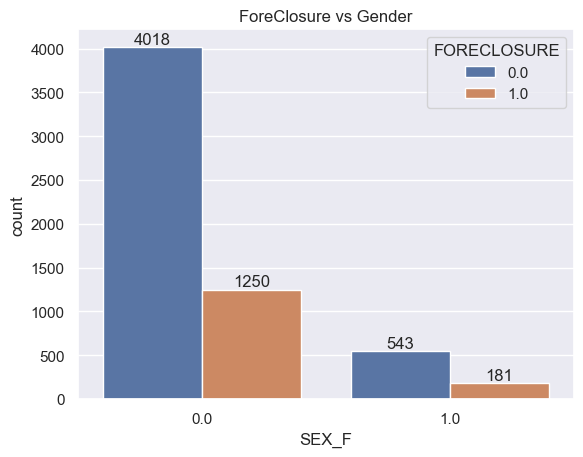

In [198]:
#plot to compare proportion of foreclosure across the Gender
ax=sns.countplot(x=data_mod.SEX_F, hue=data_mod.FORECLOSURE)
ax.set_title('ForeClosure vs Gender')
for x in ax.containers:
    ax.bar_label(x)

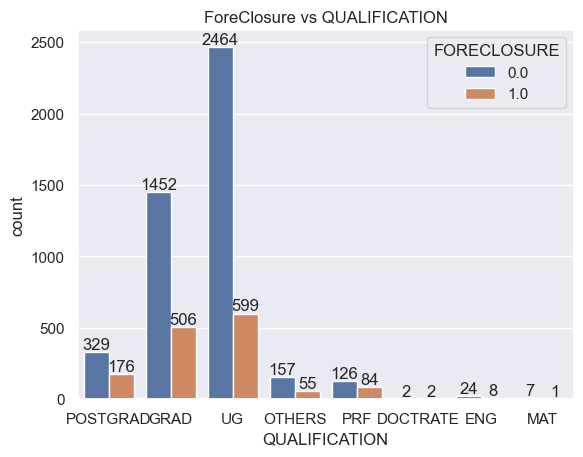

In [199]:
#plot to compare proportion of foreclosure across the Qualification
ax=sns.countplot(x=data_mod_['QUALIFICATION'], hue=data_mod_.FORECLOSURE)
ax.set_title('ForeClosure vs QUALIFICATION')
for x in ax.containers:
    ax.bar_label(x)

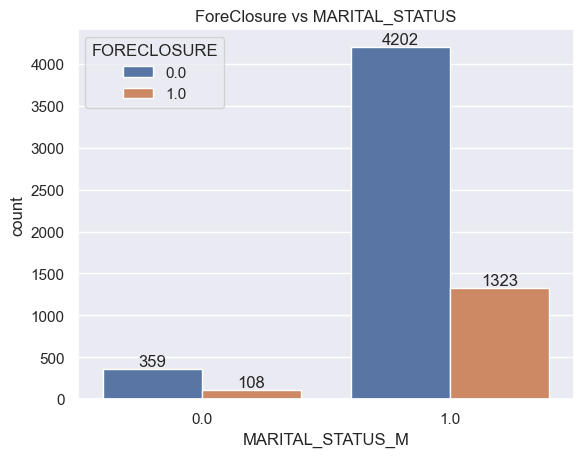

In [200]:
#plot to compare proportion of foreclosure across the marital_status
ax=sns.countplot(x=data_mod.MARITAL_STATUS_M, hue=data_mod.FORECLOSURE)
ax.set_title('ForeClosure vs MARITAL_STATUS')
for x in ax.containers:
    ax.bar_label(x)

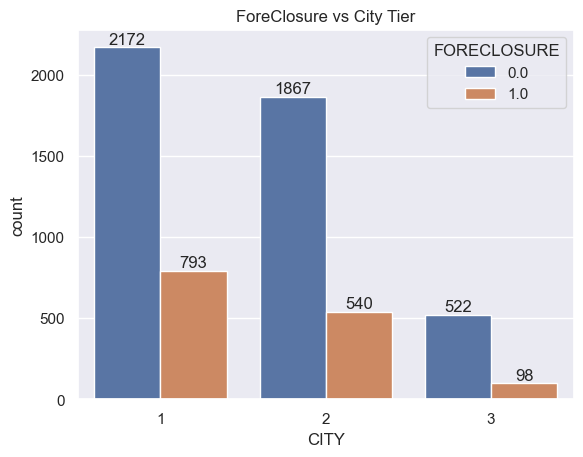

In [201]:
#plot to compare proportion of foreclosure across the city tier
ax=sns.countplot(x=data_mod.CITY, hue=data_mod.FORECLOSURE)
ax.set_title('ForeClosure vs City Tier')
for x in ax.containers:
    ax.bar_label(x)

In [202]:
#crerating a dataframe to store the binned continuos variables
binned_data=pd.DataFrame()
binned_data['Prepayment']=data_mod.FORECLOSURE
#creating a function for binning the continuos variables
def num_binner(df,column_name):
    ma=df[column_name].max()
    mi=df[column_name].min()
    num_classes=6
    width=(ma-mi)/num_classes
    bins_=[]
    labels_=[]
    for x in range(num_classes):
        step=mi+x*width
        step=round(step)
        bins_.append(int(step))
    for lab in range(len(bins_)):
        if lab+1!=len(bins_):
            label=str((bins_)[lab])+'-'+str((bins_)[lab+1])
            labels_.append(label)
        else:
            label=str((bins_)[lab])+'-'+str(round(ma))
            labels_.append(label)
    bins_.append(ma)
    new_name=df[column_name].name+'_'+'Binned'
    binned_data[new_name]=pd.cut(x=df[column_name] , bins=bins_ , labels=labels_ , include_lowest = True)

In [203]:
#binning the continuos variables
num_binner(data_mod,'LOAN_AMT')
num_binner(data_mod,'NET_DISBURSED_AMT')
num_binner(data_mod,'CURRENT_TENOR')
num_binner(data_mod,'ORIGNAL_TENOR')
num_binner(data_mod,'PRE_EMI_DUEAMT')
num_binner(data_mod,'PRE_EMI_RECEIVED_AMT')
num_binner(data_mod,'PRE_EMI_OS_AMOUNT')
num_binner(data_mod,'EMI_DUEAMT')
num_binner(data_mod,'EMI_RECEIVED_AMT')
num_binner(data_mod,'EMI_OS_AMOUNT')
num_binner(data_mod,'EXCESS_AVAILABLE')
num_binner(data_mod,'EXCESS_ADJUSTED_AMT')
num_binner(data_mod,'BALANCE_EXCESS')
num_binner(data_mod,'NET_RECEIVABLE')
num_binner(data_mod,'OUTSTANDING_PRINCIPAL')
num_binner(data_mod,'PAID_PRINCIPAL')
num_binner(data_mod,'PAID_INTEREST')
num_binner(data_mod,'MONTHOPENING')
num_binner(data_mod,'LAST_RECEIPT_AMOUNT')
num_binner(data_mod,'COMPLETED_TENURE')
num_binner(data_mod,'BALANCE_TENURE')
num_binner(data_mod,'MOB')
num_binner(data_mod,'GROSS_INCOME')
num_binner(data_mod,'NETTAKEHOMEINCOME')

In [204]:
#udf for creating countplots
def count_plotter(DF):
    for x in DF.columns:
        y = len(DF[x].iloc[0])
        if y in range(7):  
            Title='Count_plot_for_'+x
            sns.set(font_scale = 1)
            ax=sns.countplot(data=binned_data,x=x, hue=binned_data.Prepayment)
            ax.set_title(Title)
            for x in ax.containers:
                ax.bar_label(x)
            plt.show()
        else: 
            Title='Count_plot_for_'+x
            sns.set(font_scale = .45)
            ax=sns.countplot(data=binned_data,x=x, hue=binned_data.Prepayment)
            ax.set_title(Title)
            for x in ax.containers:
                ax.bar_label(x)
            plt.show()

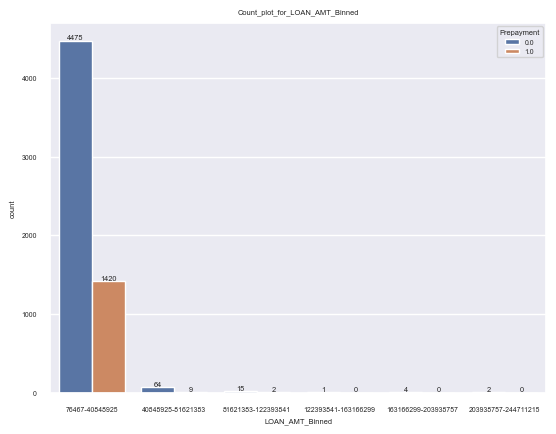

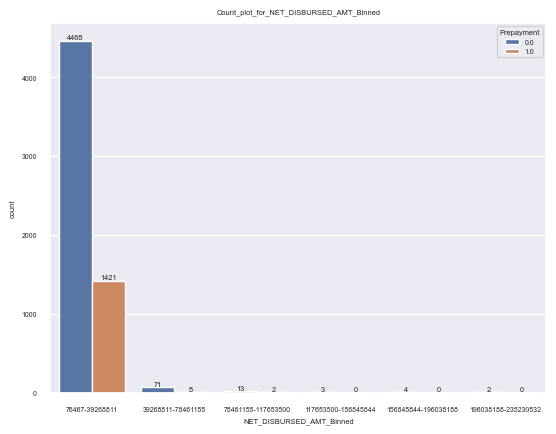

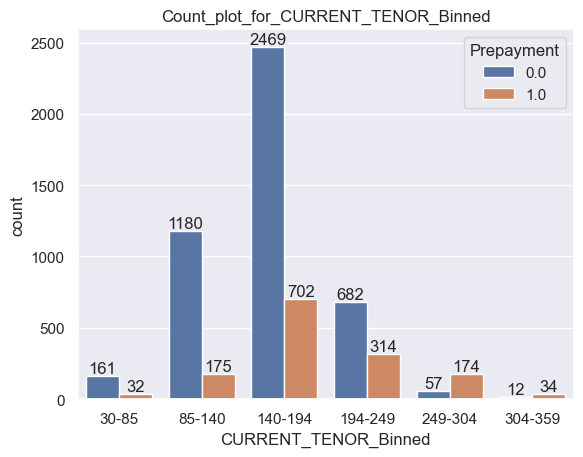

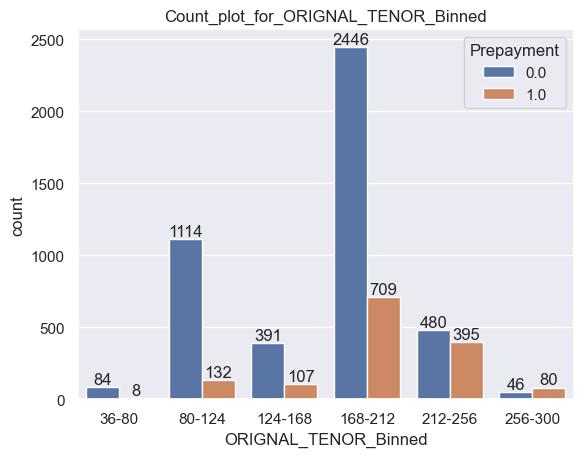

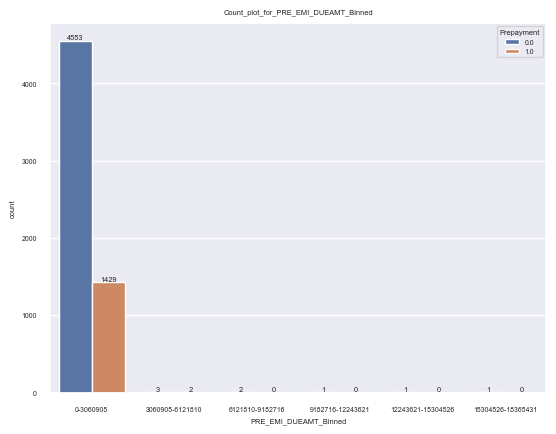

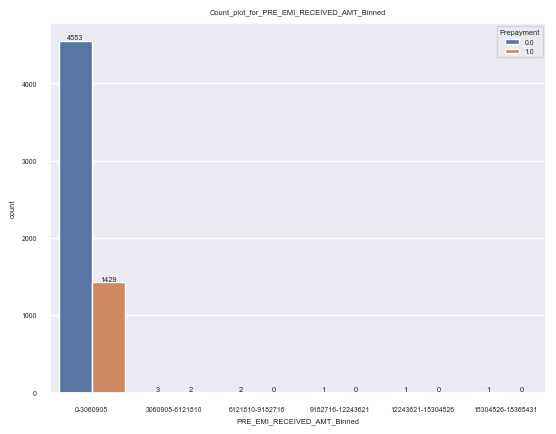

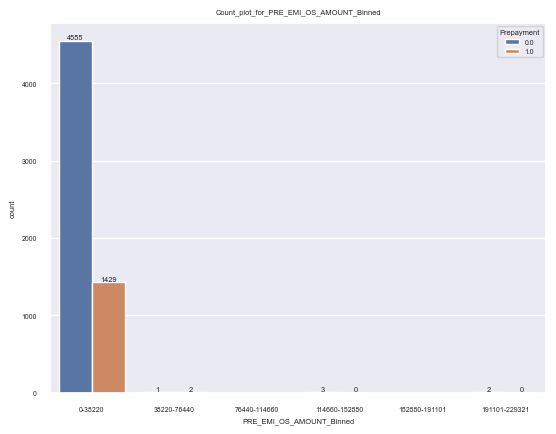

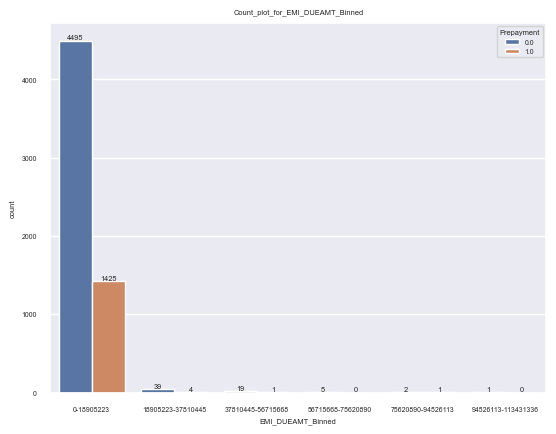

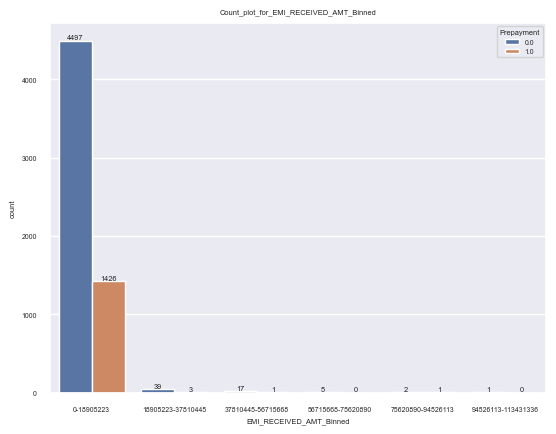

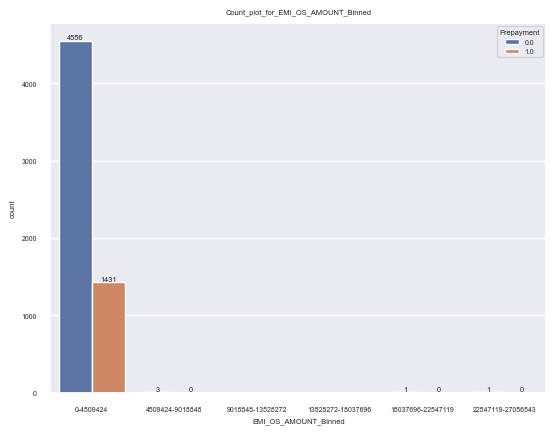

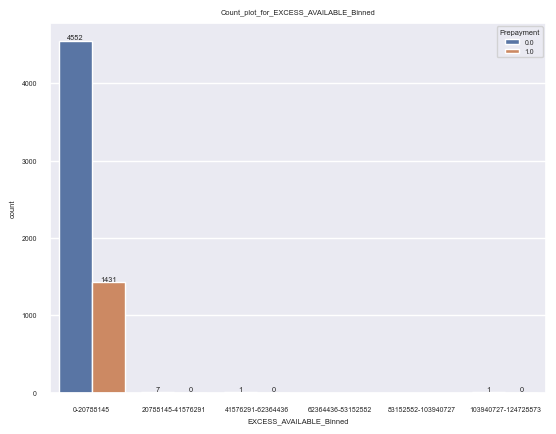

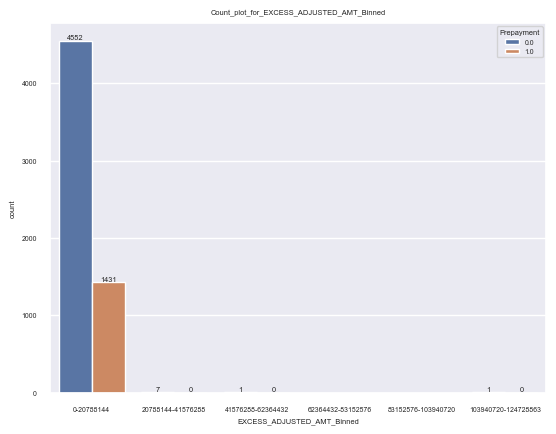

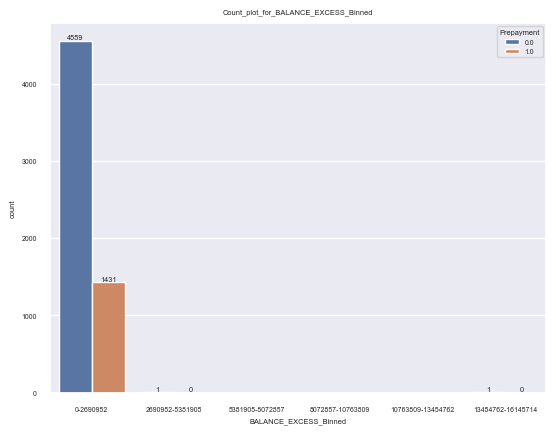

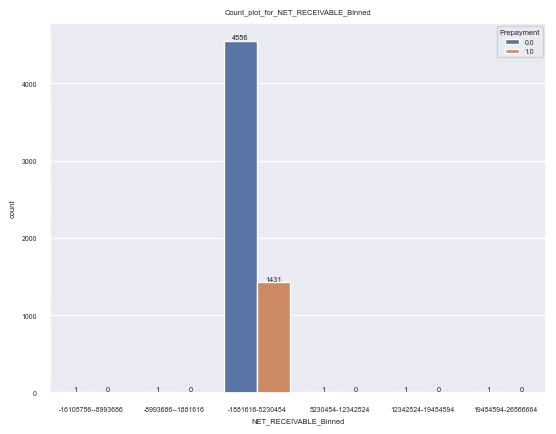

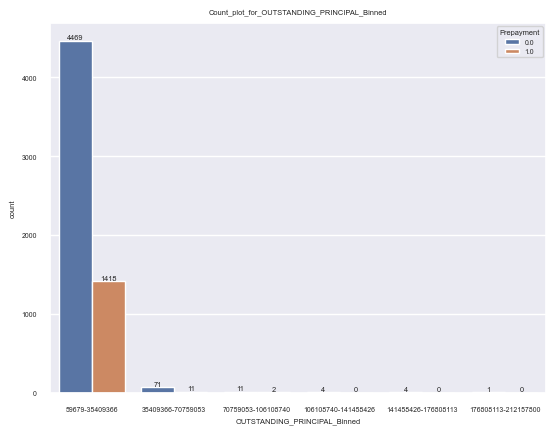

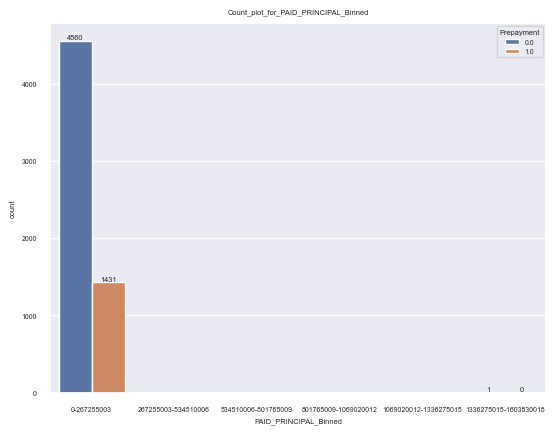

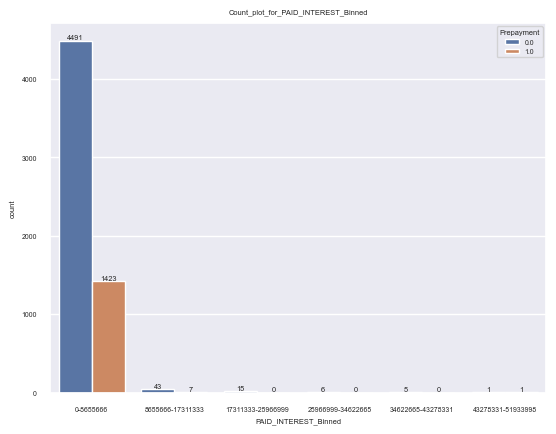

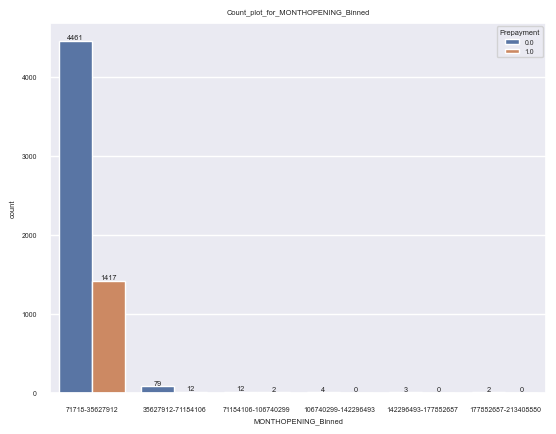

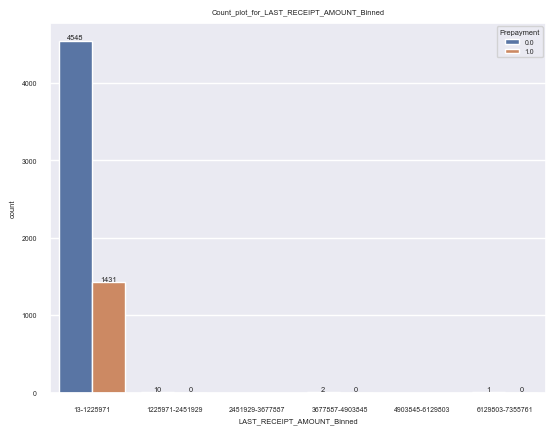

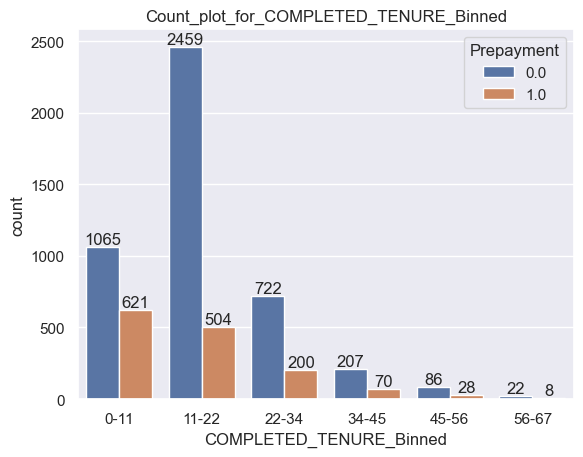

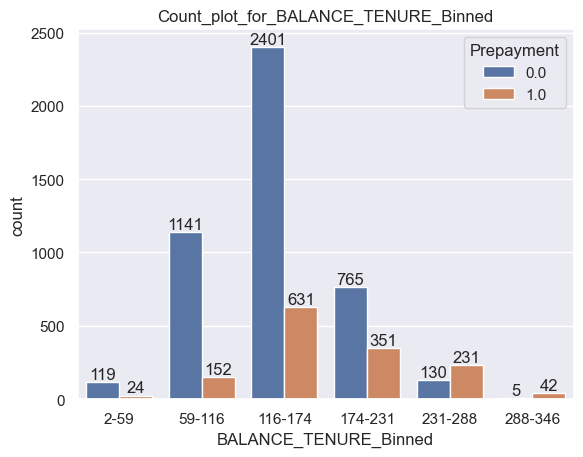

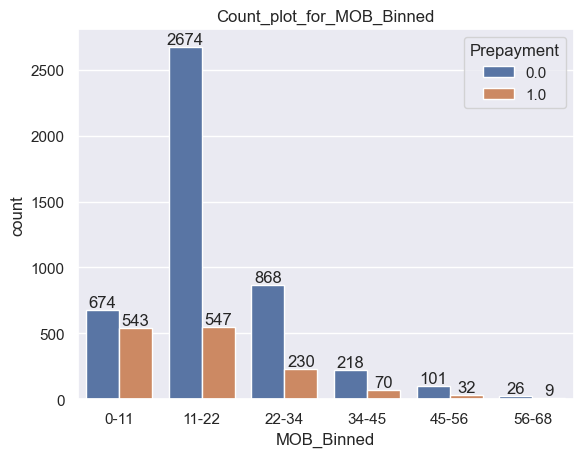

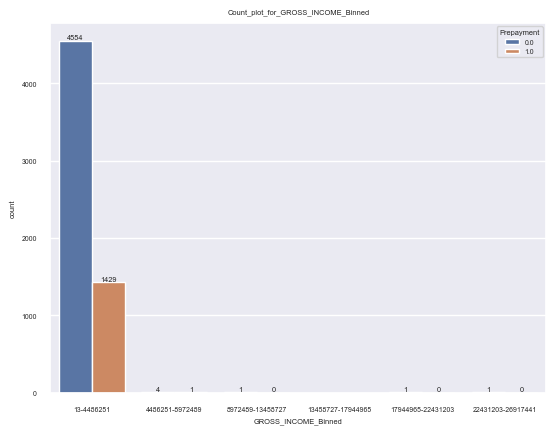

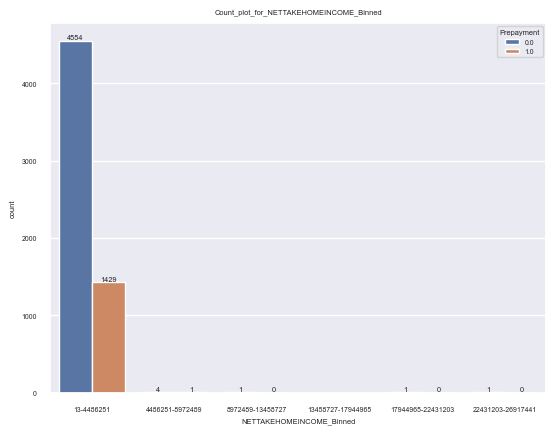

In [205]:
#plotting the prepayment stats across the binned data
count_plotter(binned_data.iloc[:,1:])

<Axes: >

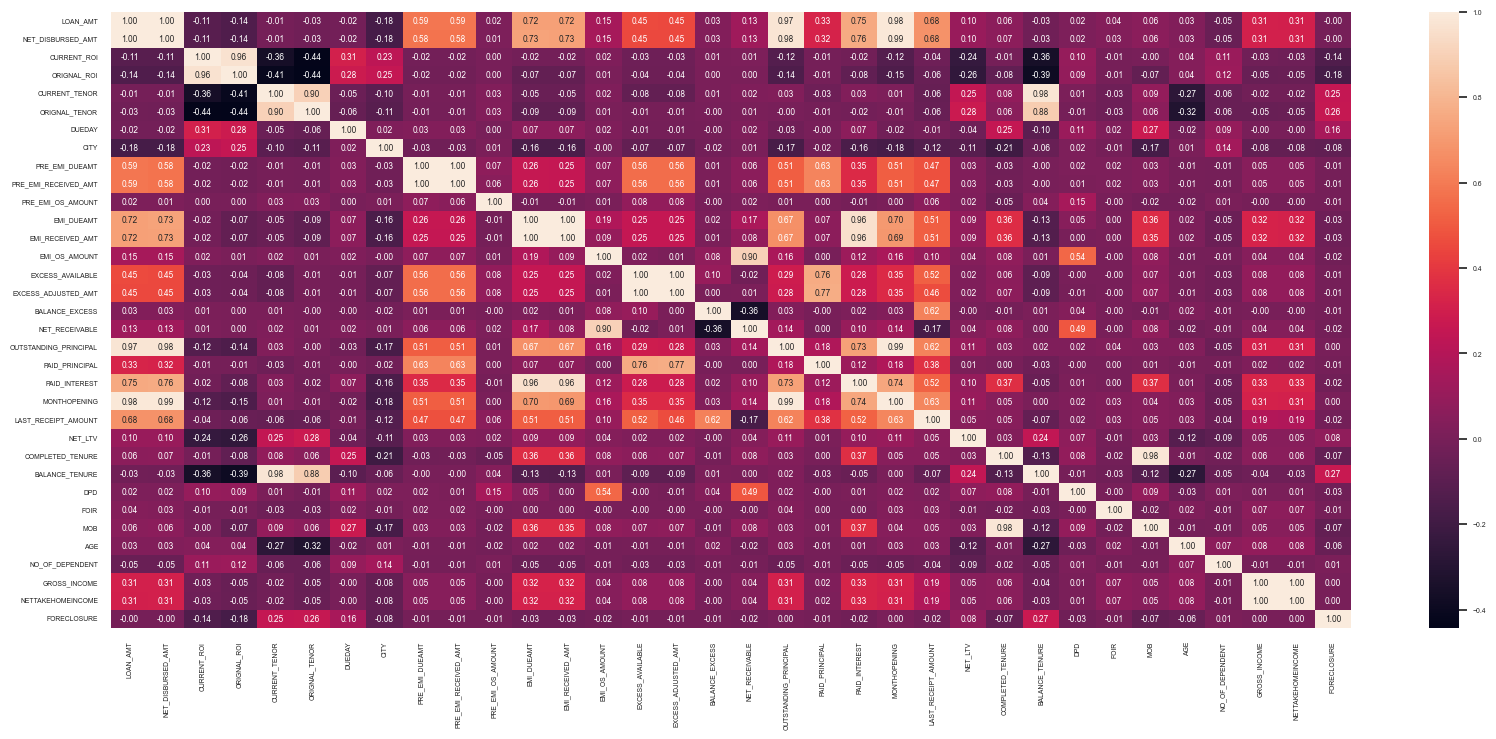

In [206]:
#heatmap to check the correlation
data_heatmap=data_mod.iloc[:, :34]
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(data_heatmap.corr(),square=False, annot=True, fmt='.2f', annot_kws={'size':6})

### BIVARIATE FOR SOME VARIABLES

Text(0.5, 1.0, 'Age vs Outstanding Principal')

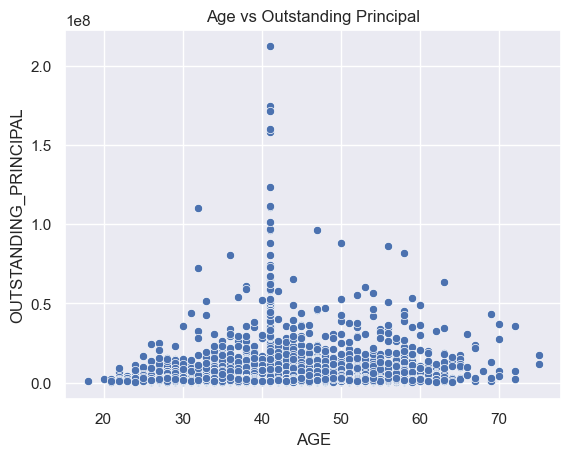

In [142]:
#Age and Principal outstanding
sns.set(font_scale=1)
sns.scatterplot(x=data_mod['AGE'],y=data_mod['OUTSTANDING_PRINCIPAL']).set_title('Age vs Outstanding Principal')

Text(0.5, 1.0, 'MOB vs Outstanding Pricipal')

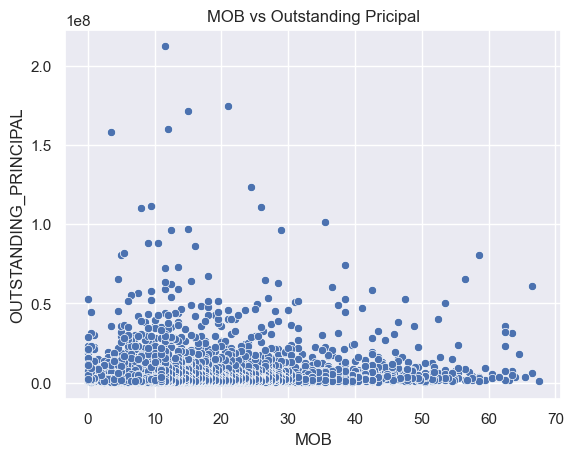

In [143]:
#Months on book vs Outstanding Principal
sns.scatterplot(x=data_mod['MOB'],y=data_mod['OUTSTANDING_PRINCIPAL']).set_title('MOB vs Outstanding Pricipal')

Text(0.5, 1.0, 'Balance Tenure vs Outstanding Pricipal')

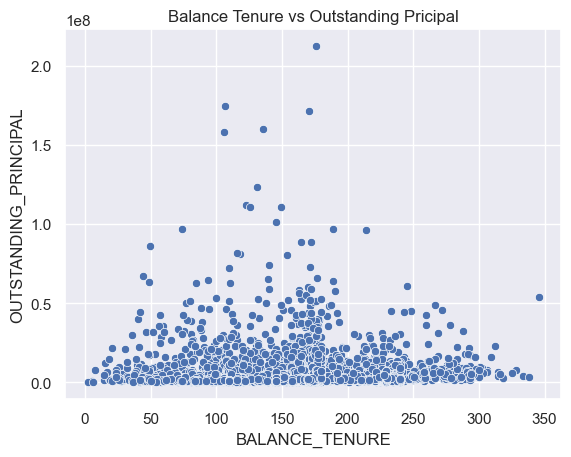

In [144]:
#scatter plot bw balance tenure and outstandind principal
sns.scatterplot(x=data_mod['BALANCE_TENURE'],
                y=data_mod['OUTSTANDING_PRINCIPAL']).set_title('Balance Tenure vs Outstanding Pricipal')

Text(0.5, 1.0, 'Completed Tenure vs Outstanding Pricipal')

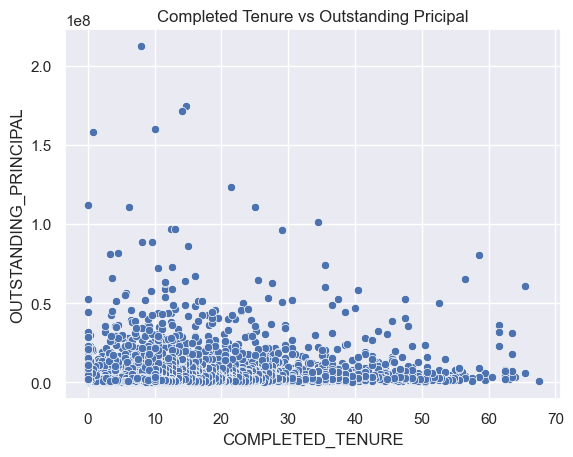

In [145]:
#scatter plot of completed tenure vs outstanding principal
sns.scatterplot(x=data_mod['COMPLETED_TENURE'],
                y=data_mod['OUTSTANDING_PRINCIPAL']).set_title('Completed Tenure vs Outstanding Pricipal')

In [268]:
#keeping a copy of teh model data to create a dashbord and refer to it later
num=data_mod_.iloc[:,:34]
cat=data_mod_.iloc[:,50:]
data_model=pd.concat([num,cat],axis=1)
data_model.to_csv(r"C:\Users\jubin\OneDrive\Desktop\SIP (Vitti Ai)\Loan Prepayment\DashBoard Data.csv")

## MODEL CREATION

In [146]:
#since XGBoost and Tree based algos are prone or somewhat immune to outliers and multicolinearoty
#we don't need the prepare model data in that way

In [147]:
#predictors and target variable
X=data_mod.drop(columns=['FORECLOSURE'])
y=data_mod.FORECLOSURE

In [148]:
#since there is a class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_smote,y_smote=smt.fit_resample(X,y)

In [149]:
#splttinh the data to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.25, random_state=0)

In [150]:
#importing kfold cross validaion and cross validation report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### RANDOM FOREST CLASSIFIER

In [151]:
#using Random ForestClassifier as a classification model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [152]:
#using Kfold Cross Validation and 10 folds run across 5 iterations to see how the accuracy is affected
for x in range(5):
    cv = KFold(n_splits=10, random_state=0, shuffle=True)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % ((scores).mean(), (scores).std()))

Accuracy: 0.950 (0.007)
Accuracy: 0.949 (0.007)
Accuracy: 0.949 (0.008)
Accuracy: 0.949 (0.007)
Accuracy: 0.949 (0.005)


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1161
         1.0       0.95      0.96      0.95      1120

    accuracy                           0.95      2281
   macro avg       0.95      0.95      0.95      2281
weighted avg       0.95      0.95      0.95      2281



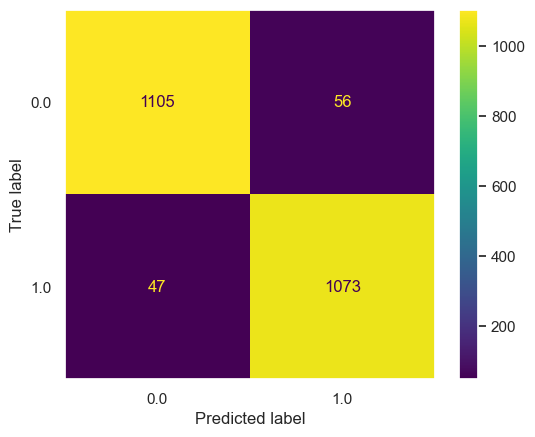

In [153]:
# having a loook at the confusion matrix and the classifiction report to understand model performance
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.grid(None)

In [154]:
#Function to plot feature importace 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:15], y=fi_df['feature_names'][:15])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

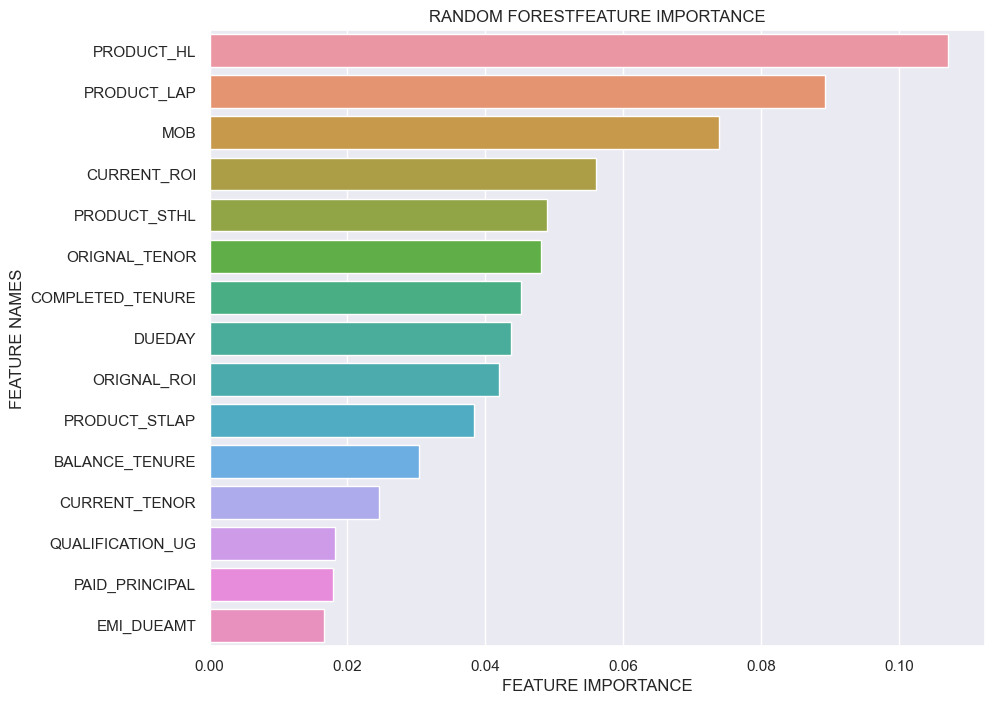

In [155]:
#having a look at the top 15 features that help predict the prepayment for a given customer
#the embed method of feature importance was used
plot_feature_importance(model.feature_importances_,X_train.columns,'RANDOM FOREST')

### XGBOOST CLASSIFIER

In [156]:
#using XGBClassifier as a classificatio model
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)

In [157]:
#using Kfold Cross Validation and 10 folds run across 5 iterations to see how the accuracy is affected
for x in range(5):
    cv = KFold(n_splits=10, shuffle=True)
    scores = cross_val_score(xgbc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % ((scores).mean(), (scores).std()))

Accuracy: 0.958 (0.006)
Accuracy: 0.957 (0.007)
Accuracy: 0.958 (0.010)
Accuracy: 0.958 (0.006)
Accuracy: 0.956 (0.005)


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1161
         1.0       0.96      0.96      0.96      1120

    accuracy                           0.96      2281
   macro avg       0.96      0.96      0.96      2281
weighted avg       0.96      0.96      0.96      2281



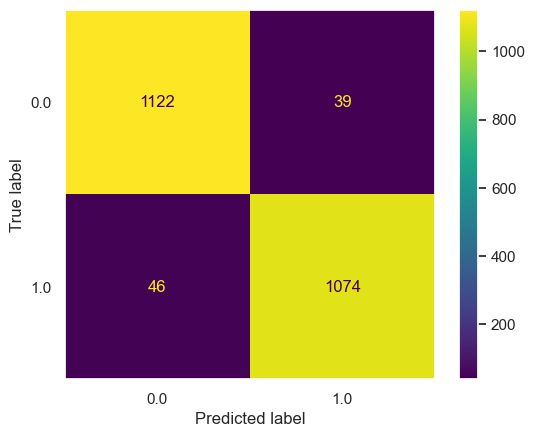

In [158]:
# having a loook at the confusion matrix and the classifiction report to understand model performance
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.grid(None)

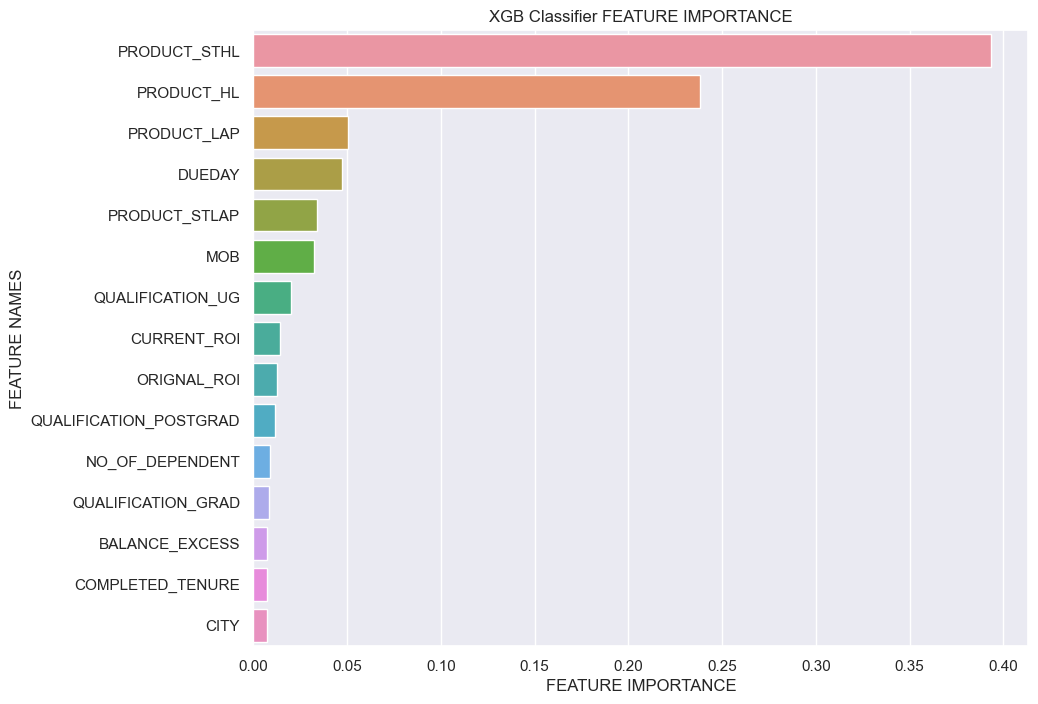

In [159]:
#having a look at the top 15 features that help predict the prepayment for a given customer
#the embed method of feature importance was used
plot_feature_importance(xgbc.feature_importances_,X_train.columns,'XGB Classifier ')

### BORUTA  AND FEATURE SELECTION  

In [160]:
from boruta import BorutaPy

#### BORUTA WITH RANDOM FOREST CLASSIFIER

In [161]:
#in spite of good model accuracy we can see that the model is quite complex with so many variables
#Therefore using Boruta we arrive at the most important variables in an interative manner
boruta = BorutaPy(estimator=rfc, n_estimators='auto', max_iter=20)
boruta.fit(np.array(X_smote),np.array(y_smote))
strong_predictors_rfc=X_smote.columns[boruta.support_].to_list()
print(strong_predictors_rfc)

['LOAN_AMT', 'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE', 'FOIR', 'MOB', 'AGE', 'NO_OF_DEPENDENT', 'GROSS_INCOME', 'NETTAKEHOMEINCOME', 'PRODUCT_HL', 'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'QUALIFICATION_GRAD', 'QUALIFICATION_UG']


In [162]:
#lets havae a look at how many variables were reatined 
drop_vars = len(X_train.columns)-len(strong_predictors_rfc)
ret_vars = len(strong_predictors_rfc)
retention_rate = ret_vars/len(X_train.columns) * 100
print(f"{ret_vars} variables were retained")
print(f"Retention rate was {retention_rate}% ")

36 variables were retained
Retention rate was 73.46938775510205% 


In [163]:
#The model will therefore yeild similar power with the above predictors....
#No need to necessary involve all the variables

#### BORUTA WITH RANDOM XGBOOST

In [164]:
#in spite of good model accuracy we can see that the model is quite complex with so many variables
#Therefore using Boruta we arrive at the most important variables in an interative manner
boruta = BorutaPy(estimator=xgbc, n_estimators='auto', max_iter=20)
boruta.fit(np.array(X_smote),np.array(y_smote))
strong_predictors_xgboost=X_smote.columns[boruta.support_].to_list()
print(strong_predictors_xgboost)

['CURRENT_ROI', 'ORIGNAL_ROI', 'ORIGNAL_TENOR', 'DUEDAY', 'CITY', 'BALANCE_EXCESS', 'PAID_INTEREST', 'COMPLETED_TENURE', 'MOB', 'PRODUCT_HL', 'PRODUCT_LAP', 'PRODUCT_STHL', 'PRODUCT_STLAP', 'SEX_F', 'QUALIFICATION_GRAD', 'QUALIFICATION_POSTGRAD', 'QUALIFICATION_UG']


In [165]:
#The XGboost model requies 20 as the optimal features these variables offer the same preditive power
#whilst reducing the model complexity too
#lets havae a look at how many variables were reatined 
drop_vars = len(X_train.columns)-len(strong_predictors_xgboost)
ret_vars = len(strong_predictors_xgboost)
retention_rate = ret_vars/len(X_train.columns) * 100
print(f"{ret_vars} variables were retained")
print(f"Retention rate was {retention_rate}% ")

17 variables were retained
Retention rate was 34.69387755102041% 
